In [1]:
#import Modules 
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
from textblob import TextBlob
import re
import twitter_keys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Classes 

In [2]:
#to do operation on Twitter's Client
class TwitterCLIENT():
    def __init__(self,twitter_user = None):
        self.auth = TwitterAUTHENTICATOR().authenticate_twitter_app()
        self.twitter_client = API(self.auth)
        self.twitter_user = twitter_user
        
    def get_twitter_client_api(self):
        return self.twitter_client

        
    def gets_user_timeline_tweets(self,num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline,id = self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets
    
    def get_friend_list(self,num_friend):
        friend_list=[]
        for friend in Cursor(self.twitter_client.friends,id = self.twitter_user).items(num_friend):
            friend_list.append(friend)
        return friend_list
    
    def get_home_timeline_tweets(self,num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_clinet.home_timeline,id = self.twitter_user).itmes(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [3]:
#This class store Tweets in a file and handle errors
class TwitterLISTNER(StreamListener):
    def __init__(self,fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename
    def on_data(self,data):
        try:
            print(data)
            with open(self.fetched_tweets_filename,"a") as tweet_file:
                tweet_file.write(data)
            return True
        except BaseException as e:
            print("Error on data ",str(e))
        return True
    
    def on_error(self,status):
        if status ==420:
            return False
        print(status)

In [4]:
#Authenticate User details
class TwitterAUTHENTICATOR():
    
    def authenticate_twitter_app(self):
        auth = OAuthHandler(twitter_keys.Api_key,twitter_keys.API_secret_key)
        auth.set_access_token(twitter_keys.Access_token,twitter_keys.Access_token_secret)
        return auth

In [5]:
#This class stream twitter's data and search according to a desire keyword
class TwitterSTREAM():
    def __init__(self):
        self.twitter_authenticator = TwitterAUTHENTICATOR()
    
    def stream_tweets(self,fetched_tweets_filename,keyword_list):
        listener = TwitterLISTNER(fetched_tweets_filename)
        auth = self.twitter_authenticator.authenticate_twitter_app()
        stream = Stream(auth , listener)
        stream.filter(track=keyword_list)

In [6]:
#This class Analyse the Tweet sentiment
class TweetANALYZER():
    global pos,neu,neg
    
    def clean_tweet(self,tweet):
        return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self,tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return "Positive"
        elif analysis.sentiment.polarity == 0 :
            return "Neutral"
        else:
            return "Negative"
        
    def tweets_to_dataframe(self,tweets):
        df = pd.DataFrame(data = [tweet.text for tweet in tweets],columns=["tweets"])
        df["id"] = np.array([tweet.id for tweet in tweets])
        df["len"] = np.array([len(tweet.text) for tweet in tweets])
        df["likes"] = np.array([tweet.favorite_count for tweet in tweets])
        df["sourse"] = np.array([tweet.source for tweet in tweets])
        df["retweet"] = np.array([tweet.retweet_count for tweet in tweets])
        df["date"] = np.array([tweet.created_at for tweet in tweets])
                                  
        return df
    

# Gathering data and Analysis

In [7]:
#Gather a Twitter handle Data
handle = input("Enter the Handle name you want to check : ")
twitter_client = TwitterCLIENT(handle)
print(twitter_client.gets_user_timeline_tweets(1))

#Output will come into .json format 

Enter the Handle name you want to check : india
[Status(_api=<tweepy.api.API object at 0x000001AC382E59C8>, _json={'created_at': 'Fri Jun 19 17:12:41 +0000 2020', 'id': 1274027336380243968, 'id_str': '1274027336380243968', 'text': '@dineshSharma266 @EconomicTimes 😲', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dineshSharma266', 'name': 'dinesh sharma #BoycottChina', 'id': 744558547699130368, 'id_str': '744558547699130368', 'indices': [0, 16]}, {'screen_name': 'EconomicTimes', 'name': 'Economic Times', 'id': 39743812, 'id_str': '39743812', 'indices': [17, 31]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1274025649280172032, 'in_reply_to_status_id_str': '1274025649280172032', 'in_reply_to_user_id': 744558547699130368, 'in_reply_to_user_id_str': '744558547699130368', 'in_reply_to_screen_name': 'dineshSharma266', 'user': {'id': 1276481, 'id_st

In [14]:
#Store data about keywors in a file 
keyword_list = ["modi","t-series","covid-19"]
fetched_tweets_filename = "tweets.json"
twitter_streamer = TwitterSTREAM()
twitter_streamer.stream_tweets(fetched_tweets_filename,keyword_list)

#This operation is last long ,so we have to interrupt the Kernel

{"created_at":"Tue Jun 30 04:40:25 +0000 2020","id":1277824287714361345,"id_str":"1277824287714361345","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/pBId2ldoxb","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1272308936851378181,"id_str":"1272308936851378181","name":"Gombal","screen_name":"Gombal24042994","location":null,"url":null,"description":"Semoga terampuni","translator_type":"none","protected":false,"verified":false,"followers_count":1,"friends_count":48,"listed_count":0,"favourites_count":13,"statuses_count":895,"created_a

{"created_at":"Tue Jun 30 04:40:26 +0000 2020","id":1277824290109284353,"id_str":"1277824290109284353","text":"RT @Sanjay_drishti: @chatukhor @ugiboogie2 https:\/\/t.co\/pL9pP3VLEh","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":105095307,"id_str":"105095307","name":"uttam sengupta","screen_name":"chatukhor","location":"New Delhi, India","url":null,"description":"Journalist, Consulting Editor at @NH_India","translator_type":"none","protected":false,"verified":false,"followers_count":1873,"friends_count":1046,"listed_count":30,"favourites_count":21590,"statuses_count":47424,"created_at":"Fri Jan 15 10:25:30 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_ba

{"created_at":"Tue Jun 30 04:40:26 +0000 2020","id":1277824291506196480,"id_str":"1277824291506196480","text":"RT @News24: Gauteng is recording more new Covid-19 cases a day than any province has at any time. This week, the province recorded more tha\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":165763746,"id_str":"165763746","name":"Ayanda M*","screen_name":"Ayola_M","location":"Sandton, South Africa","url":"http:\/\/www.facebook.com\/mkhAyaHair","description":"Alma mater: @WitsUniversity. Student @WitsBschool Lover of all good wine #BursaryNetwork Community. Owner of MkhAya Hair\ud83d\ude0fActivist. Brand Ambassador\ud83d\udc69\u200d\ud83d\udd2c\ud83d\udc69\ud83c\udffe\u200d\ud83d\udcbb","translator_type":"none","protected

{"created_at":"Tue Jun 30 04:40:27 +0000 2020","id":1277824294030999553,"id_str":"1277824294030999553","text":"RT @srivatsayb: @RahulGandhi 18 of India\u2019s 30 unicorns are Chinese funded\n\nPayTM\nSwiggy\nBigBasket\nOla\nByju\nMakeMyTrip\nHike\nOyo\nQuikr\nSnapde\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1153347602152210432,"id_str":"1153347602152210432","name":"Chetan Khanna","screen_name":"ChetanKhanna07","location":null,"url":null,"description":"Views expressed are in personal capacity. Retweet does not mean endorsement. Sports and politics. GGMU, MI & Roger Federer fan. Like debating logic and facts.","translator_type":"none","protected":false,"verified":false,"followers_count":514,"friends_count":723,"listed_co

{"created_at":"Tue Jun 30 04:40:27 +0000 2020","id":1277824295549325314,"id_str":"1277824295549325314","text":"@1MeraHindustaan @zoo_bear Maza aa gyi di.\nModi ji always surprises us.\ud83e\udd70","display_text_range":[27,72],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1277823883098365952,"in_reply_to_status_id_str":"1277823883098365952","in_reply_to_user_id":1183320661260783616,"in_reply_to_user_id_str":"1183320661260783616","in_reply_to_screen_name":"1MeraHindustaan","user":{"id":1165997294115647488,"id_str":"1165997294115647488","name":"\u0906\u092f\u0941\u0937\u0940 \ud83c\uddee\ud83c\uddf3","screen_name":"proudSanghan","location":"\ud83c\uddee\ud83c\uddf3","url":null,"description":"Proud Indian\ud83c\uddee\ud83c\uddf3,Proud Sanatani, Pro-Modi, Chemical Engineer, Animal Lover,\nKarma Believer,Vindictive, Virgo Girl.","translator_type":"none","protected":false,"

{"created_at":"Tue Jun 30 04:40:27 +0000 2020","id":1277824296480460800,"id_str":"1277824296480460800","text":"RT @srinivasiyc: \ud83d\udd25 Big Retaliation.\n\ud83d\udd25 Digital Air Strike.\n\n20 Soldiers Ke Badle 59 Apps Ban.\n\nI am sure China is feeling scared after seein\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":886561784659714048,"id_str":"886561784659714048","name":"Shankar Lal Dhakar(sihana)","screen_name":"GaneshTrailor","location":"Jahazpur Bhilwara, Rajasthan","url":null,"description":"\ud83d\ude4f\ud83d\ude4f\u092a\u094d\u0930\u092d\u0941 \ud83d\ude4f\ud83d\ude4f\n\u092e\u0941\u091d \u092e\u0947\u0902 \u0939\u092e\u0947\u0936\u093e \u0907\u0902\u0938\u093e\u0928\u093f\u092f\u0924 \u091c\u093f\u0902\u0926\u

{"created_at":"Tue Jun 30 04:40:28 +0000 2020","id":1277824297952673794,"id_str":"1277824297952673794","text":"RT @leahmcelrath: Twitter deleted @markaprovost\u2019s viral tweet. COPY, PASTE, SHARE:\n\nPharma giant Gilead announced they\u2019ll charge $2500 for\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3528564315,"id_str":"3528564315","name":"BetterWorld #BLM#TrumpOwnsEveryDeath","screen_name":"Betterw05759703","location":"Missouri, USA","url":null,"description":"Activist Humanitarian Environmentalist Conservationist Progressive Peace\ud83c\udf0d\ud83c\udf3b\ud83c\udf37\ud83c\udf38 #BanAssaultWeapons #BlackLivesMatter #CHILDREN MATTER #RightMatters\ud83d\ude4f\ud83c\uddfa\ud83c\uddf8\u270c\ud83c\udffc","translator_type":"none","prote

{"created_at":"Tue Jun 30 04:40:28 +0000 2020","id":1277824299525521408,"id_str":"1277824299525521408","text":"RT @abrahamendieta: Durante los 3 meses de contingencia han fallecido 519 personas por Covid-19 en Guanajuato.\n\nDurante estos mismos 3 mese\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":105819083,"id_str":"105819083","name":"Balto Fuentes \ud83c\uddf2\ud83c\uddfd Sonora","screen_name":"baltomx","location":"sonora","url":null,"description":"Ing industrial, amigo de los amigos, amante del campo, intolerante de la corrupci\u00f3n y la mafia pol\u00edtica...de cualquier color. The all seeing eye \ud83d\udc41 #RedAmlo","translator_type":"none","protected":false,"verified":false,"followers_count":1916,"friends_count":29

{"created_at":"Tue Jun 30 04:40:28 +0000 2020","id":1277824300456849410,"id_str":"1277824300456849410","text":"RT @SarojKabu: \u0906\u091c \u090f\u0915 \u0910\u0924\u093f\u0939\u093e\u0938\u093f\u0915 \u0926\u093f\u0928 \u0939\u0948 :-\n\n\u0905\u092c \u0936\u0939\u0940\u0926\u094b\u0902 \u0915\u093e \u092c\u0926\u0932\u093e,\nAPP \u0938\u0947 \u0932\u093f\u092f\u093e \u091c\u093e\u090f\u0917\u093e\n\nThank You Modi Ji,\n1 \u0915\u0947 \u092c\u0926\u0932\u0947 3 \u091a\u0940\u0928\u0940 APP\ud83d\ude4f\n@RTforINDIA @Sanjee\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1277659832858771456,"id_str":"1277659832858771456","name":"Gandhi Ji","screen_name":"GandhiJ02891567","location":null,"url":null,"description":"\u092e\u0941\

{"created_at":"Tue Jun 30 04:40:28 +0000 2020","id":1277824301387747333,"id_str":"1277824301387747333","text":"RT @markaprovost: Twitter did me dirty.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":763580410726985729,"id_str":"763580410726985729","name":"Ms. M \ud83c\udf34\ud83c\udf1e\ud83c\uddf5\ud83c\uddf7\ud83e\udd51","screen_name":"113avocado","location":"Colorado, USA","url":null,"description":"Was an Army wife for 16 years, now a mom and a grandma, a hiker, a genealogist and lover of languages and cultures.","translator_type":"none","protected":false,"verified":false,"followers_count":289,"friends_count":787,"listed_count":1,"favourites_count":38706,"statuses_count":1853,"created_at":"Thu Aug 11 03:38:51 +0000 2016","utc_offs

{"created_at":"Tue Jun 30 04:40:29 +0000 2020","id":1277824302478311424,"id_str":"1277824302478311424","text":"Chutiyaapa kar ke koi jet tha nhi hai  jake phele #China ko bodar se hato fir kuch aayake bolna...","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1275225411593498625,"id_str":"1275225411593498625","name":"Mr_danish\ud83d\udd4b\ud83c\uddee\ud83c\uddf3","screen_name":"Mrdanishoffici1","location":"Kolkata","url":null,"description":"I m indian\ud83c\uddee\ud83c\uddf3\nProud be a Muslim \ud83d\udd4b","translator_type":"none","protected":false,"verified":false,"followers_count":4,"friends_count":70,"listed_count":0,"favourites_count":229,"statuses_count":16,"created_at":"Tue Jun 23 00:33:37 +0000 2020","utc_offset":null,"time_zone":null,"geo

{"created_at":"Tue Jun 30 04:40:29 +0000 2020","id":1277824304583827456,"id_str":"1277824304583827456","text":"#ApologizeNowDucey","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":726222523428265984,"id_str":"726222523428265984","name":"glenn matsumura","screen_name":"gmatsumura2","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":5,"friends_count":4,"listed_count":0,"favourites_count":1233,"statuses_count":650,"created_at":"Sat Apr 30 01:31:56 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"","profile_background_i

{"created_at":"Tue Jun 30 04:40:30 +0000 2020","id":1277824306274119680,"id_str":"1277824306274119680","text":"@narendramodi Modi ij hame andaman and nicobar islands pr aapna tourist spot banana chahiye kuki vaha pr agar touri\u2026 https:\/\/t.co\/nPJxaLnxr5","display_text_range":[14,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1275265755760586752,"in_reply_to_status_id_str":"1275265755760586752","in_reply_to_user_id":18839785,"in_reply_to_user_id_str":"18839785","in_reply_to_screen_name":"narendramodi","user":{"id":1277817091505053698,"id_str":"1277817091505053698","name":"SOHAM TARLEKAR MH10BM6060","screen_name":"mh10bm6060","location":null,"url":null,"description":"only for mom n dad","translator_type":"none","protected":false,"verified":false,"followers_count":0,"friends_count":9,"listed_count":0,"favourites_count":1,"statuses_count":2,"created_at":"Tue Jun

{"created_at":"Tue Jun 30 04:40:30 +0000 2020","id":1277824307545157636,"id_str":"1277824307545157636","text":"Gobierno del Estado de Veracruz|| \ud83d\udccc Con tu ayuda lo podemos lograr #QuedateEnCasa y evitemos los contagios por Covi\u2026 https:\/\/t.co\/or0yA2LrXI","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1195770443661299712,"id_str":"1195770443661299712","name":"Tsunami Veracruzano","screen_name":"TVeracruzan0","location":null,"url":"http:\/\/tsunamiveracruzano.com.mx\/","description":"Es un medio de informaci\u00f3n alternativo, publicamos las noticias que son consideradas relevantes para el Estado de Veracruz. \nhttps:\/\/www.facebook.com\/sunamivera","translator_type":"none","protected":

{"created_at":"Tue Jun 30 04:40:30 +0000 2020","id":1277824309872824320,"id_str":"1277824309872824320","text":"RT @nesoron: \u2066@ShekharGupta\u2069 Will you still continue to close your eyes to the reality and mollycoddle Modi? https:\/\/t.co\/i6skjMx5p2","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2391248486,"id_str":"2391248486","name":"Cool papa","screen_name":"shrichandrajosh","location":"india","url":null,"description":"supporter of gandhi,nehru congress.","translator_type":"none","protected":false,"verified":false,"followers_count":2347,"friends_count":1787,"listed_count":50,"favourites_count":30854,"statuses_count":198666,"created_at":"Sat Mar 15 15:57:00 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":tru

{"created_at":"Tue Jun 30 04:40:31 +0000 2020","id":1277824311009697793,"id_str":"1277824311009697793","text":"RT @PresidencialVE: #EnVivo \ud83d\udcf9 | \u201cEn las \u00faltimas 24 horas se han registrado 91 casos de COVID-19 por transmisi\u00f3n comunitaria, que correspond\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1152177025886695424,"id_str":"1152177025886695424","name":"OA Barquisimeto","screen_name":"oabqtoivss2","location":"Lara, Venezuela","url":"http:\/\/www.ivss.gob.ve","description":"Nuestro objetivo es garantizar la seguridad social. #PorUnSeguroM\u00e1sSocial","translator_type":"none","protected":false,"verified":false,"followers_count":782,"friends_count":1716,"listed_count":0,"favourites_count":10139,"st

{"created_at":"Tue Jun 30 04:40:31 +0000 2020","id":1277824312515260416,"id_str":"1277824312515260416","text":"RT @COVIDNewsByMIB: #COVID19 Updates:\n\nGlobal COVID-19 cases cross 1 crore mark with almost 5 lakh fatalities.\n\nIndia has less than 5.5 lak\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1241621974310211584,"id_str":"1241621974310211584","name":"FOB Azamgarh, Ministry I&B ,GOI","screen_name":"AzamgarhFob","location":"Azamgarh","url":null,"description":"Field Outreach Bureau, Azamgarh under @MIB_India, Engage in field publicity,outreach programs,awareness campaigns and publicise Government Schemes,GOI","translator_type":"none","protected":false,"verified":false,"followers_count":199,"friends_count":146,"listed_c

{"created_at":"Tue Jun 30 04:40:31 +0000 2020","id":1277824313928716288,"id_str":"1277824313928716288","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/Mey5gmVmb2","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1272308936851378181,"id_str":"1272308936851378181","name":"Gombal","screen_name":"Gombal24042994","location":null,"url":null,"description":"Semoga terampuni","translator_type":"none","protected":false,"verified":false,"followers_count":1,"friends_count":48,"listed_count":0,"favourites_count":13,"statuses_count":896,"created_a

{"created_at":"Tue Jun 30 04:40:32 +0000 2020","id":1277824314813759488,"id_str":"1277824314813759488","text":"RT @HuiJin20113124: \u5f88\u6709\u610f\u601d\u554a\uff0c\u8fd9\u4e24\u5929\u8def\u5fb7\u63d0\u5230\u65af\u91cc\u5170\u5361\u548c\u4ed6\u4eec\u51a0\u72b6\u75c5\u6bd2\u65b9\u9762\u6709\u4e0d\u5c11\u7816\u5bb6\uff0c\u6ca1\u60f3\u5230\u4eca\u5929\u5f6d\u57f9\u5965\u548c\u65af\u91cc\u5170\u5361\u7684\u5916\u4ea4\u90e8\u957f\u901a\u4e86\u7535\u8bdd\uff0c\u6709\u610f\u601d","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1166618296113926145,"id_str":"1166618296113926145","name":"88j\u2006j","screen_name":"88jj3","location":null,"url":null,"description":"\u53ea\u4f1a\u505a\u83dc","translator_type":"none","protected":false,"verified"

{"created_at":"Tue Jun 30 04:40:32 +0000 2020","id":1277824315988283394,"id_str":"1277824315988283394","text":"RT @USAmbBR: #TrabalhandoJuntos \ud83c\uddfa\ud83c\uddf8\ud83c\udde7\ud83c\uddf7","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1069436399240253440,"id_str":"1069436399240253440","name":"Oswaldo Mendes","screen_name":"omendesfilho","location":"S\u00e3o Paulo","url":null,"description":"Sou um sobrevivente dos anos 60 e porque n\u00e3o dizer dos 70, 80 e dos 90 tamb\u00e9m...","translator_type":"none","protected":false,"verified":false,"followers_count":1097,"friends_count":1417,"listed_count":0,"favourites_count":88411,"statuses_count":38158,"created_at":"Mon Dec 03 03:41:21 +0000 2018","utc_offset":null,"time_zone":null,

{"created_at":"Tue Jun 30 04:40:32 +0000 2020","id":1277824316919463939,"id_str":"1277824316919463939","text":"RT @stevenspohn: On June 11th, Michael Hickson, a quadriplegic black man with COVID-19 was killed by a hospital in Austin Texas.\n\nDoctors d\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":141771939,"id_str":"141771939","name":"\ud835\udc46\ud835\udc34\ud835\udc3c\ud835\udc41\u271e \ud835\udc3d\ud835\udc3b\ud835\udc41\ud835\udc46\ud835\udc41","screen_name":"XBJII","location":"LA-Vegas-Dallas","url":null,"description":"OG RAVER | IRON ADDICT","translator_type":"none","protected":false,"verified":false,"followers_count":733,"friends_count":508,"listed_count":10,"favourites_count":42990,"statuses_count":95715,"created_a

{"created_at":"Tue Jun 30 04:40:32 +0000 2020","id":1277824317783449600,"id_str":"1277824317783449600","text":"RT @yessirtns: With the SCAM under RGF getting bigger and the CHINESE APPS getting BANNED, heard that PAPPU is now worried about the possib\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":784651034056679424,"id_str":"784651034056679424","name":"\u0a95\u0acc\u0ab6\u0abf\u0a95 \u0aa6\u0ac7\u0ab8\u0abe\u0a88 \u0915\u094c\u0936\u093f\u0915 \u0926\u0947\u0938\u093e\u0908 Kaushik Desai","screen_name":"KaushikDesai16","location":"New Jersey, USA","url":null,"description":"MAS FDU, NJ, Supports Modi, CAA_NRC_NPR, Ram-Mandir, population control,  \ud83d\udeabDrug\ud83d\udeabAlcohol\ud83d\udeabGuns, PETA, Women Liberation, Ve

{"created_at":"Tue Jun 30 04:40:33 +0000 2020","id":1277824318672646144,"id_str":"1277824318672646144","text":"RT @Reuters: Arizona Governor Doug Ducey ordered the closure of bars, nightclubs, gyms, movie theaters and water parks for at least 30 days\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":776892454356262912,"id_str":"776892454356262912","name":"Christian Hidalgo","screen_name":"Chidalgo239","location":"Florida, USA","url":null,"description":"I\u2019m your typical Venezuelan \ud83c\uddfb\ud83c\uddeaneighbor except I\u2019m way funnier \ud83d\ude1d","translator_type":"none","protected":false,"verified":false,"followers_count":46,"friends_count":314,"listed_count":1,"favourites_count":4612,"statuses_count":2599,"created_

{"created_at":"Tue Jun 30 04:40:33 +0000 2020","id":1277824319645573121,"id_str":"1277824319645573121","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/b8hMXNrXXT","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1256050540712083458,"id_str":"1256050540712083458","name":"Tora","screen_name":"Tora_zi","location":null,"url":null,"description":"repost","translator_type":"none","protected":false,"verified":false,"followers_count":30,"friends_count":101,"listed_count":0,"favourites_count":77,"statuses_count":1930,"created_at":"Fri May 01 0

{"created_at":"Tue Jun 30 04:40:33 +0000 2020","id":1277824321356853250,"id_str":"1277824321356853250","text":"RT @AhmedSabique: Master stroke by N D Modi at last we saw the spectacular performance of Rafale fighter jets ..they completely blocked the\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3903318556,"id_str":"3903318556","name":"Spirit of Congress","screen_name":"SpiritOfCongres","location":"India","url":null,"description":"Arun. Congress forever.  @CongressGST \nLet's Grow Stronger Together \ud83d\udcaa\ud83d\udcaa\n| Proudly followed by you |","translator_type":"none","protected":false,"verified":false,"followers_count":24906,"friends_count":8891,"listed_count":14,"favourites_count":92989,"statuses_count":77715,"c

{"created_at":"Tue Jun 30 04:40:34 +0000 2020","id":1277824323890425861,"id_str":"1277824323890425861","text":"RT @meeenx_: Covid-19 is so serious &amp; I know sticking to the regulations perfectly is difficult but we need to do better. We need to beat t\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":849653478,"id_str":"849653478","name":"\u24c2fanelo \u24c2arvin","screen_name":"Marvin_Shilenge","location":"World","url":null,"description":"God 1st\ud83d\ude47|Tsonga|Red Devil,Barca \n& Chiefs Fan\u26bd","translator_type":"none","protected":false,"verified":false,"followers_count":607,"friends_count":577,"listed_count":0,"favourites_count":355,"statuses_count":6125,"created_at":"Thu Sep 27 17:42:39 +0000 2012","utc_offset":null,"time_zone"

{"created_at":"Tue Jun 30 04:40:34 +0000 2020","id":1277824324976730113,"id_str":"1277824324976730113","text":"RT @jguaido: Importante informaci\u00f3n del Diputado y Doctor @joseolivaresm ante la propagaci\u00f3n del COVID-19 y la vulnerabilidad del sistema d\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1021009794,"id_str":"1021009794","name":"Juan Sarcos","screen_name":"juansarcosmusic","location":null,"url":"http:\/\/www.juansarcos.com","description":"La Voz del Latin Jazz","translator_type":"none","protected":false,"verified":false,"followers_count":341,"friends_count":273,"listed_count":0,"favourites_count":150403,"statuses_count":66375,"created_at":"Wed Dec 19 01:00:32 +0000 2012","utc_offset":null,"time_zone":null,"g

{"created_at":"Tue Jun 30 04:40:34 +0000 2020","id":1277824325853184000,"id_str":"1277824325853184000","text":"@BillKristol Trump, his cabinet, and @SenateGOP should be tried for treason and face the maximum penalty for what t\u2026 https:\/\/t.co\/foH1SHcxtK","display_text_range":[13,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277797240552243209,"in_reply_to_status_id_str":"1277797240552243209","in_reply_to_user_id":2800581040,"in_reply_to_user_id_str":"2800581040","in_reply_to_screen_name":"BillKristol","user":{"id":1195467139651489794,"id_str":"1195467139651489794","name":"The Cativist","screen_name":"KeelerSlappy","location":null,"url":null,"description":"I've been unapologetically anti-Trump since 2015.\nI knew he would wreck our country in four years.\nI won't stop until he is gone.","translator_type":"none","protected":false,"verified":false,"followers_count":242,"fri

{"created_at":"Tue Jun 30 04:40:35 +0000 2020","id":1277824327090503680,"id_str":"1277824327090503680","text":"RT @budiawan83: Cara kerja yg extra ordinary dari presiden hingga mengeluarkan perppu penanganan covid-19 \n#ExtraOrdinaryAtasiPandemi\nMente\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1230520662936059904,"id_str":"1230520662936059904","name":"\u015aua\u0155a Ha\u0163i","screen_name":"7int4Putih","location":null,"url":null,"description":"Silent Warrior - Political Analyst - Kebenaran akan bertahan, kejahatan akan tumbang.\n\nTweets Saya semata-mata hanya ingin agar cahaya menerangi kegelapan \ud83c\uddee\ud83c\udde9","translator_type":"none","protected":false,"verified":false,"followers_count":2605,"friends_cou

{"created_at":"Tue Jun 30 04:40:35 +0000 2020","id":1277824329070317568,"id_str":"1277824329070317568","text":"RT @meeenx_: Covid-19 is so serious &amp; I know sticking to the regulations perfectly is difficult but we need to do better. We need to beat t\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1023482094,"id_str":"1023482094","name":"#SAXONWOLDSHEBEEN","screen_name":"dada_Mpisane","location":"GUPTAS ESTATE","url":"http:\/\/followme.com","description":"If you doubt God you making him a Liar","translator_type":"none","protected":false,"verified":false,"followers_count":222,"friends_count":537,"listed_count":1,"favourites_count":1760,"statuses_count":10933,"created_at":"Thu Dec 20 04:19:08 +0000 2012","utc_offset":null,

{"created_at":"Tue Jun 30 04:40:35 +0000 2020","id":1277824329779200003,"id_str":"1277824329779200003","text":"RT @joseolivaresm: Informaci\u00f3n importante sobre #COVID19 en Zulia: \n\nEn los \u00faltimos 10 d\u00edas, han fallecido 6 m\u00e9dicos y 1 enfermera en Zulia\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":178497567,"id_str":"178497567","name":"Wacho","screen_name":"walliers","location":"Venezuela","url":null,"description":"lo \u00fanico constante en la vida es el cambio y yo me dispongo a cambiar para bien, porque el que quiere puede cambiar pero no todo el que puede quiere hacerlo","translator_type":"none","protected":false,"verified":false,"followers_count":453,"friends_count":619,"listed_count":0,"favourites

{"created_at":"Tue Jun 30 04:40:35 +0000 2020","id":1277824330991206400,"id_str":"1277824330991206400","text":"Meanwhile Modi ji to World on @Shehzad_Ind ckmkb tweets . https:\/\/t.co\/FAbKFOfGOk","display_text_range":[0,57],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":474193581,"id_str":"474193581","name":"Patriot","screen_name":"Sashakt77","location":"Indore, India","url":null,"description":"Proud Bhartiya \ud83c\uddee\ud83c\uddf3\u2764\ufe0f\n\n\u0938\u094c\u0917\u0902\u0927 \u092e\u0941\u091d\u0947 \u0907\u0938 \u092e\u093f\u091f\u094d\u091f\u0940 \u0915\u0940\n\u092e\u0948\u0902 \u0926\u0947\u0936 \u0928\u0939\u0940 \u092e\u093f\u091f\u0928\u0947 \u0926\u0942\u0901\u0917\u093e\n\u092f\u0947 \u0926\u0947\u0936 \u0928\u0939\u

{"created_at":"Tue Jun 30 04:40:36 +0000 2020","id":1277824332308176897,"id_str":"1277824332308176897","text":"RT @BrynnTannehill: I don't think anything I've seen so perfectly captures why there's no way the US is going to be getting on top of COVID\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2265370081,"id_str":"2265370081","name":"han","screen_name":"doodlelimhan","location":null,"url":"http:\/\/Instagram.com\/dooodle_","description":"\ud83e\udd37\ud83c\udffb\u200d\u2642\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":284,"friends_count":443,"listed_count":0,"favourites_count":2027,"statuses_count":9169,"created_at":"Sat Dec 28 04:46:16 +0000 2013","utc_offset":null,"time_zone":null,

{"created_at":"Tue Jun 30 04:40:36 +0000 2020","id":1277824333432393728,"id_str":"1277824333432393728","text":"RT @Aakar__Patel: Gandhi may have been simple but he had to put it on display. Travel third class, go shirtless, spin his yarn. \nModi may w\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":955970244,"id_str":"955970244","name":"Kanad Bandyopadhyay","screen_name":"BKanad","location":"Jambudwipe, Bharatkhande","url":null,"description":"@BKanad@mastodon.social  interested to know more about Equities,ETF,  Vedas,Upanishads,Puranas, Yoga,Travel Ancient Lit\ud83d\udd49,geo politics,opensource X Army Engrs :","translator_type":"none","protected":false,"verified":false,"followers_count":1799,"friends_count":3902,"listed_cou

{"created_at":"Tue Jun 30 04:40:36 +0000 2020","id":1277824334162096128,"id_str":"1277824334162096128","text":"RT @rahulroushan: Just saw hundreds of tiktokers walking on foot towards foreign countries. Modi govt has triggered another crisis.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1101373537774796800,"id_str":"1101373537774796800","name":"Tarvoti","screen_name":"Tarvoti1","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":12,"friends_count":600,"listed_count":0,"favourites_count":2,"statuses_count":12531,"created_at":"Fri Mar 01 06:48:08 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_tr

{"created_at":"Tue Jun 30 04:40:37 +0000 2020","id":1277824335575539714,"id_str":"1277824335575539714","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/XIQN52xfd6","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1256050540712083458,"id_str":"1256050540712083458","name":"Tora","screen_name":"Tora_zi","location":null,"url":null,"description":"repost","translator_type":"none","protected":false,"verified":false,"followers_count":30,"friends_count":101,"listed_count":0,"favourites_count":77,"statuses_count":1931,"created_at":"Fri May 01 0

{"created_at":"Tue Jun 30 04:40:37 +0000 2020","id":1277824337702039553,"id_str":"1277824337702039553","text":"RT @harrisonjaime: First, @LindseyGrahamSC said 50k COVID-19 deaths was our limit. Then he said 100k. Then 120k.\n\nWith over 120k dead, we k\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1254193811669913601,"id_str":"1254193811669913601","name":"Janice Johnson","screen_name":"jjonthemnt","location":"Flagstaff, AZ","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":20,"friends_count":7,"listed_count":0,"favourites_count":2041,"statuses_count":1122,"created_at":"Sat Apr 25 23:42:22 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null

{"created_at":"Tue Jun 30 04:40:37 +0000 2020","id":1277824339128262656,"id_str":"1277824339128262656","text":"Two die from COVID-19 at Fort #Smith #Mercy over the weekend - Jun 30 @ 12:39 AM ET https:\/\/t.co\/vDOxKrJJxd","source":"\u003ca href=\"http:\/\/pulpnews.com\" rel=\"nofollow\"\u003ePulpNews\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":100986964,"id_str":"100986964","name":"PulpNews Crime","screen_name":"PulpNews","location":"USA","url":"http:\/\/OddCrimes.com","description":"The Fastest Crime News Updates on the Planet!","translator_type":"none","protected":false,"verified":false,"followers_count":4839,"friends_count":936,"listed_count":1092,"favourites_count":60,"statuses_count":3496185,"created_at":"Fri Jan 01 14:32:20 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":fal

{"created_at":"Tue Jun 30 04:40:38 +0000 2020","id":1277824340243906560,"id_str":"1277824340243906560","text":"RT @Bill_Esterson: Government has announced that benefits sanctions will restart tomorrow. This is declaring war on many hard working famil\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2761255835,"id_str":"2761255835","name":"JDT","screen_name":"WeeManWiTheFlag","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":121,"friends_count":87,"listed_count":5,"favourites_count":6814,"statuses_count":15484,"created_at":"Thu Sep 04 14:00:28 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_t

{"created_at":"Tue Jun 30 04:40:38 +0000 2020","id":1277824341108015104,"id_str":"1277824341108015104","text":"RT @melnicksergio: La OMS es la responsable de casi todos los errores en todo el episodio covid....esta manejada por un operador pol\u00edtico d\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1230350667161702402,"id_str":"1230350667161702402","name":"Paulina","screen_name":"DNellyP_2","location":null,"url":null,"description":"Segura por el RECHAZO. S\u00edgueme y te sigo, la uni\u00f3n hace la fuerza.","translator_type":"none","protected":false,"verified":false,"followers_count":3578,"friends_count":3944,"listed_count":0,"favourites_count":6485,"statuses_count":7331,"created_at":"Thu Feb 20 04:37:41 +0000 2020","ut

{"created_at":"Tue Jun 30 04:40:38 +0000 2020","id":1277824342731128832,"id_str":"1277824342731128832","text":"RT @Jesse: Something that should be noted: not a single state seeing a spike right now is seeing a second wave. The states experiencing spi\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2443404000,"id_str":"2443404000","name":"Ian Portnoy","screen_name":"disAPPility","location":null,"url":"http:\/\/www.disappility.com","description":"disAPPility Proving Ground","translator_type":"none","protected":false,"verified":false,"followers_count":661,"friends_count":882,"listed_count":139,"favourites_count":57992,"statuses_count":34036,"created_at":"Mon Apr 14 06:05:49 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":false,"l

{"created_at":"Tue Jun 30 04:40:39 +0000 2020","id":1277824343930617856,"id_str":"1277824343930617856","text":"RT @geetv79: @RahulGandhi Reliance Jio had imported 4,35,000 new 4G SIM cards from China at a cost of Rs 93,92,846 in 2016. \n\nShould Jio ph\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":768733022560612352,"id_str":"768733022560612352","name":"SanthoshSri","screen_name":"JohnWick1904","location":null,"url":null,"description":"@actorvijay Anna Fan #JrNTR #Messi #Traveler #spreadLove #Ignorenegativity","translator_type":"none","protected":false,"verified":false,"followers_count":63,"friends_count":672,"listed_count":0,"favourites_count":2215,"statuses_count":3540,"created_at":"Thu Aug 25 08:53:30 +0000 2016","utc_o

{"created_at":"Tue Jun 30 04:40:39 +0000 2020","id":1277824344710881281,"id_str":"1277824344710881281","text":"RT @HuiJin20113124: \u5f88\u6709\u610f\u601d\u554a\uff0c\u8fd9\u4e24\u5929\u8def\u5fb7\u63d0\u5230\u65af\u91cc\u5170\u5361\u548c\u4ed6\u4eec\u51a0\u72b6\u75c5\u6bd2\u65b9\u9762\u6709\u4e0d\u5c11\u7816\u5bb6\uff0c\u6ca1\u60f3\u5230\u4eca\u5929\u5f6d\u57f9\u5965\u548c\u65af\u91cc\u5170\u5361\u7684\u5916\u4ea4\u90e8\u957f\u901a\u4e86\u7535\u8bdd\uff0c\u6709\u610f\u601d","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1081780589458530304,"id_str":"1081780589458530304","name":"\ud83d\ude37Coffee Cantata\ud83d\ude37\ud83c\uddfa\ud83c\uddf8 \u5496\u5561 \u6587\u6a02 GTV","screen_name":"lattecantata","location":"United States","url"

{"created_at":"Tue Jun 30 04:40:39 +0000 2020","id":1277824345872781313,"id_str":"1277824345872781313","text":"RT @LauRamirez2: @LuisOlavarrieta  Por favor ay\u00fadanos a difundir. Mi pap\u00e1, es un m\u00e9dico de Lara. El ha sido diagnosticado con COVID-19 se e\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":204988933,"id_str":"204988933","name":"Jostan Carvajal","screen_name":"jostysai","location":"Caracas","url":null,"description":"Libertario Cristiano Radical","translator_type":"none","protected":false,"verified":false,"followers_count":1798,"friends_count":4998,"listed_count":21,"favourites_count":86901,"statuses_count":133584,"created_at":"Tue Oct 19 22:41:08 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang"

{"created_at":"Tue Jun 30 04:40:39 +0000 2020","id":1277824347214950400,"id_str":"1277824347214950400","text":"RT @SethAbramson: Arizona's governor waited until Trump left the state to take any action to protect Arizonians. That craven political calc\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":813586660843802624,"id_str":"813586660843802624","name":"Robert m. Brooks","screen_name":"RobertmBrooks1","location":"N.J.","url":null,"description":"#Resist #FuckTrump","translator_type":"none","protected":false,"verified":false,"followers_count":216,"friends_count":492,"listed_count":0,"favourites_count":7580,"statuses_count":8234,"created_at":"Tue Dec 27 03:25:50 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":false,"

{"created_at":"Tue Jun 30 04:40:40 +0000 2020","id":1277824351329562624,"id_str":"1277824351329562624","text":"RT @GlblCtzn: For Love Choir's cover of Beyonc\u00e9's 'Freedom' is everything \ud83d\ude4c Take action with us to help marginalized people break free from\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":19997192,"id_str":"19997192","name":"JL.Espo","screen_name":"JoanLEsposito","location":"Connecticut, USA","url":null,"description":"If we had confidence that the president did not commit a crime, we would have said so\n\n\u2014 Mueller","translator_type":"none","protected":false,"verified":false,"followers_count":271,"friends_count":1436,"listed_count":2,"favourites_count":16869,"statuses_count":16551,"created_at":"

{"created_at":"Tue Jun 30 04:40:41 +0000 2020","id":1277824352289841152,"id_str":"1277824352289841152","text":"RT @NNPrezNez: JOIN US LIVE - TUESDAY AT 10:00AM ONLINE TOWN HALL \n\nImportant updates regarding COVID-19 response efforts, Wood Springs Two\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":266999028,"id_str":"266999028","name":"Dorothy O'Brien","screen_name":"dotthedragon","location":"Sedona, AZ","url":"http:\/\/www.celticharvestfestival.com","description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":260,"friends_count":300,"listed_count":0,"favourites_count":61561,"statuses_count":135539,"created_at":"Wed Mar 16 04:48:39 +0000 2011","utc_offset":null,"time_zone":null,"geo_enab

{"created_at":"Tue Jun 30 04:40:41 +0000 2020","id":1277824353506226176,"id_str":"1277824353506226176","text":"@bainjal When modi will do surgical strike on China","display_text_range":[9,51],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1277792373288792064,"in_reply_to_status_id_str":"1277792373288792064","in_reply_to_user_id":89732309,"in_reply_to_user_id_str":"89732309","in_reply_to_screen_name":"bainjal","user":{"id":1192657222779621376,"id_str":"1192657222779621376","name":"Khan","screen_name":"Khan51708415","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":0,"friends_count":39,"listed_count":0,"favourites_count":13,"statuses_count":54,"created_at":"Fri Nov 08 04:17:17 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator

{"created_at":"Tue Jun 30 04:40:41 +0000 2020","id":1277824354735144960,"id_str":"1277824354735144960","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/jOIcUrGyGh","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1256050540712083458,"id_str":"1256050540712083458","name":"Tora","screen_name":"Tora_zi","location":null,"url":null,"description":"repost","translator_type":"none","protected":false,"verified":false,"followers_count":30,"friends_count":101,"listed_count":0,"favourites_count":77,"statuses_count":1932,"created_at":"Fri May 01 0

{"created_at":"Tue Jun 30 04:40:42 +0000 2020","id":1277824356698054657,"id_str":"1277824356698054657","text":"RT @ZomVick: En Veracruz ha habido 1474 muertes por COVID-19 y, nada m\u00e1s en Abril, asesinaron a 1872 personas. \n\n\u00bfQu\u00e9 partido gobierna en V\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1069808822070337537,"id_str":"1069808822070337537","name":"V_Hinojoza","screen_name":"fronteras76","location":null,"url":null,"description":"Tuve una vez la ilusi\u00f3n de volar y cuando pude hacerlo llor\u00e9.\nInmigrante forzado, alma dividida, padre por vocaci\u00f3n, enamorado de la Luna.","translator_type":"none","protected":false,"verified":false,"followers_count":16,"friends_count":121,"listed_count":0,"fa

{"created_at":"Tue Jun 30 04:40:42 +0000 2020","id":1277824358220619779,"id_str":"1277824358220619779","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/HLaFVGTDXV","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1272308936851378181,"id_str":"1272308936851378181","name":"Gombal","screen_name":"Gombal24042994","location":null,"url":null,"description":"Semoga terampuni","translator_type":"none","protected":false,"verified":false,"followers_count":1,"friends_count":48,"listed_count":0,"favourites_count":13,"statuses_count":898,"created_a

{"created_at":"Tue Jun 30 04:40:43 +0000 2020","id":1277824360657477632,"id_str":"1277824360657477632","text":"RT @ndtv: PM Modi to address the nation at 4 pm. @sanket on what to expect https:\/\/t.co\/Ulv3CPT3Kz https:\/\/t.co\/3oekDdQQBc","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1277585846493868034,"id_str":"1277585846493868034","name":"Nimai Pandit","screen_name":"NimaiPandit5","location":null,"url":null,"description":"Make the world a better place to live.","translator_type":"none","protected":false,"verified":false,"followers_count":0,"friends_count":18,"listed_count":0,"favourites_count":4,"statuses_count":59,"created_at":"Mon Jun 29 12:53:10 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors

{"created_at":"Tue Jun 30 04:40:43 +0000 2020","id":1277824362893082625,"id_str":"1277824362893082625","text":"RT @SalmanNizami_: Modi is buying OIL from Muslim nations in low rate. Selling to Hindu majority nation in high rate. Then they abuse Mugha\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":210490170,"id_str":"210490170","name":"PRK \ud835\udce3\ud835\udcf1\ud835\udcea\ud835\udcf5\ud835\udcea\ud835\udcf9\ud835\udcea\ud835\udcfd\ud835\udcf1\ud835\udd02\ud835\udce5\ud835\udcf2\ud835\udcf3\ud835\udcea\ud835\udd0246\ud83d\udc51","screen_name":"padramesh","location":"chennai","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":488,"friends_count":519,"listed_count":50

{"created_at":"Tue Jun 30 04:40:44 +0000 2020","id":1277824365434769408,"id_str":"1277824365434769408","text":"@sna2964 @abhishekdps007 @prateek_sagar @reddivariraja @SMQureshiPTI https:\/\/t.co\/BANJXxvg7f\n\nye le pad le 2020 me\u2026 https:\/\/t.co\/09NfgqsPkc","display_text_range":[69,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277800701243133952,"in_reply_to_status_id_str":"1277800701243133952","in_reply_to_user_id":1008077138602258432,"in_reply_to_user_id_str":"1008077138602258432","in_reply_to_screen_name":"sna2964","user":{"id":756456744893767680,"id_str":"756456744893767680","name":"Mehul Kumar","screen_name":"mehul_mastana","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":6,"friends_count":164,"listed_count":0,"favourites_count":15,"statuses_count":768,"created_at":"Fri Jul 22

{"created_at":"Tue Jun 30 04:40:44 +0000 2020","id":1277824368060448768,"id_str":"1277824368060448768","text":"@DrPCShastri1 @pankhuripathak Modi will come to your house ,ask for your mobile and will delete it personally.... Stupid!!","display_text_range":[30,122],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1277818746330112001,"in_reply_to_status_id_str":"1277818746330112001","in_reply_to_user_id":890909537749827585,"in_reply_to_user_id_str":"890909537749827585","in_reply_to_screen_name":"DrPCShastri1","user":{"id":56686241,"id_str":"56686241","name":"nirantar","screen_name":"shabdnirantar","location":"ranchi,jharkhand,india","url":null,"description":"Ex Joint Secretary Govt of jharkhand IIM Ranchi","translator_type":"none","protected":false,"verified":false,"followers_count":1688,"friends_count":2193,"listed_count":5,"favourites_count":32755,"statuses_count":17799

{"created_at":"Tue Jun 30 04:40:45 +0000 2020","id":1277824370459594753,"id_str":"1277824370459594753","text":"RT @Right_T0_Health: @BBCHindi 18 of India\u2019s 30 unicorns are Chinese funded\n\nPayTM\nSwiggy\nBigBasket\nOla\nByju\nMakeMyTrip\nHike\nOyo\nQuikr\nSnap\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":134384006,"id_str":"134384006","name":"Pradeep Kudal","screen_name":"pradeepkudal","location":"\u092d\u093e\u0930\u0924","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":1852,"friends_count":4579,"listed_count":27,"favourites_count":82175,"statuses_count":45782,"created_at":"Sun Apr 18 07:45:14 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":tru

{"created_at":"Tue Jun 30 04:40:45 +0000 2020","id":1277824371449409537,"id_str":"1277824371449409537","text":"RT @SHAKTCHORI: All chamcha's be like....\nModi ki galti h modi isstefa do...\ud83d\ude02\ud83d\ude02\ud83d\ude02 https:\/\/t.co\/GaPm6DO3jz","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1271720976305156097,"id_str":"1271720976305156097","name":"TSRM","screen_name":"TsrmTsrm17","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":94,"friends_count":549,"listed_count":0,"favourites_count":7224,"statuses_count":5868,"created_at":"Sat Jun 13 08:28:22 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":fa


{"created_at":"Tue Jun 30 04:40:45 +0000 2020","id":1277824372003049473,"id_str":"1277824372003049473","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/waiBtctHhS","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1256050540712083458,"id_str":"1256050540712083458","name":"Tora","screen_name":"Tora_zi","location":null,"url":null,"description":"repost","translator_type":"none","protected":false,"verified":false,"followers_count":30,"friends_count":101,"listed_count":0,"favourites_count":77,"statuses_count":1933,"created_at":"Fri May 01 

{"created_at":"Tue Jun 30 04:40:46 +0000 2020","id":1277824373123100673,"id_str":"1277824373123100673","text":"How leadership in various countries has affected COVID-19 response effectiveness https:\/\/t.co\/NjBZ54eZpF via @ConversationUS","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3377378248,"id_str":"3377378248","name":"Augusta Newman#BlueLady #RESISTANCE","screen_name":"AugustaNewman13","location":"Fayetteville, NC","url":null,"description":"Wo\nmen with a Vision Online Community :  A network of progressive Women, with the purpose of partnering on community projects to effect change","translator_type":"none","protected":false,"verified":false,"followers_count":2697,"friends_count":5002,"listed_count":25,"favourites_count":4

{"created_at":"Tue Jun 30 04:40:46 +0000 2020","id":1277824375949938688,"id_str":"1277824375949938688","text":"@RahulGandhi It's time to listen Our Honorable PM Modi Ji, it's not election time to show your power, it's a critic\u2026 https:\/\/t.co\/Su1aFw61nL","display_text_range":[13,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277814351248801792,"in_reply_to_status_id_str":"1277814351248801792","in_reply_to_user_id":3171712086,"in_reply_to_user_id_str":"3171712086","in_reply_to_screen_name":"RahulGandhi","user":{"id":1237032678416773122,"id_str":"1237032678416773122","name":"NATIONAL POLITICAL ADVISORY COMMITTEE","screen_name":"NPACOFFICIAL","location":"Delhi, India","url":"http:\/\/NPACindia.wordpress.com","description":"Need to change the political strategies in India...","translator_type":"none","protected":false,"verified":false,"followers_count":0,"frien

{"created_at":"Tue Jun 30 04:40:46 +0000 2020","id":1277824376990076928,"id_str":"1277824376990076928","text":"@reskrimsusjtg @TheArieAir @tjhinfar21 Polri selalu menerapkan protokol kesehatan untuk mencegah Covid-19 Mulai dar\u2026 https:\/\/t.co\/BKsjXKpnN9","display_text_range":[39,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812104720822272,"in_reply_to_status_id_str":"1277812104720822272","in_reply_to_user_id":1085835382753714176,"in_reply_to_user_id_str":"1085835382753714176","in_reply_to_screen_name":"reskrimsusjtg","user":{"id":1249613918529445888,"id_str":"1249613918529445888","name":"PrioAseliJowo","screen_name":"JowoAseli","location":null,"url":null,"description":"yo wis ben","translator_type":"none","protected":false,"verified":false,"followers_count":5,"friends_count":34,"listed_count":0,"favourites_count":280,"statuses_count":656,"created_at":"Mon Apr 13 08:2

{"created_at":"Tue Jun 30 04:40:47 +0000 2020","id":1277824379045310465,"id_str":"1277824379045310465","text":"@zoo_bear Kahi aaj raat 12 baje se tum bhi  \"amaanya\" na ho jao \ud83d\ude02\ud83d\ude02 Modi ji aaj desh ko sambodhit karne wale hai \ud83d\ude02\ud83d\ude02 https:\/\/t.co\/XR3ClXL2Hh","display_text_range":[10,114],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1272807718596689922,"in_reply_to_status_id_str":"1272807718596689922","in_reply_to_user_id":935142655213703168,"in_reply_to_user_id_str":"935142655213703168","in_reply_to_screen_name":"zoo_bear","user":{"id":1241652711126208514,"id_str":"1241652711126208514","name":"Neha Singh \u263a\ufe0f\u263a\ufe0f\ud83e\udd17","screen_name":"Neha68326953","location":null,"url":null,"description":"Zindagi ka safar khubsurat hai manzil se bhi ....No DM please \u2764\ufe0f","translator_type":"none","protected":fal

{"created_at":"Tue Jun 30 04:40:47 +0000 2020","id":1277824380152602634,"id_str":"1277824380152602634","text":"Que oso Monterrey. Siempre que veo noticias me da un chingo de pena, nunca puede ser algo bueno. Que si las leyes,\u2026 https:\/\/t.co\/UswVKrEvS7","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":364551320,"id_str":"364551320","name":"Mely Gomezz","screen_name":"MelyGomeez","location":"Monterrey, Nuevo Le\u00f3n","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":200,"friends_count":66,"listed_count":0,"favourites_count":129,"statuses_count":159,"created_at":"Mon Aug 29 23:25:31 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributor

{"created_at":"Tue Jun 30 04:40:47 +0000 2020","id":1277824381142487040,"id_str":"1277824381142487040","text":"@RoyH0bbs @ninja_quilter Trump, his cabinet, and @SenateGOP should be tried for treason and face the maximum penalt\u2026 https:\/\/t.co\/2i8y17dFhZ","display_text_range":[25,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277821792812445697,"in_reply_to_status_id_str":"1277821792812445697","in_reply_to_user_id":1260287632103411715,"in_reply_to_user_id_str":"1260287632103411715","in_reply_to_screen_name":"RoyH0bbs","user":{"id":1195467139651489794,"id_str":"1195467139651489794","name":"The Cativist","screen_name":"KeelerSlappy","location":null,"url":null,"description":"I've been unapologetically anti-Trump since 2015.\nI knew he would wreck our country in four years.\nI won't stop until he is gone.","translator_type":"none","protected":false,"verified":false,"followers_

{"created_at":"Tue Jun 30 04:40:48 +0000 2020","id":1277824381855490048,"id_str":"1277824381855490048","text":"RT @AshaVaadi: @anubhavsinha https:\/\/t.co\/Usfywfmt7G","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":364201777,"id_str":"364201777","name":"Indian by Blood","screen_name":"sushilyadavsky","location":"NEW DELHI, INDIA","url":"http:\/\/www.fb.com\/skybastee","description":"What I find sexy is....?\nIntelligence","translator_type":"none","protected":false,"verified":false,"followers_count":108,"friends_count":62,"listed_count":0,"favourites_count":106,"statuses_count":2838,"created_at":"Mon Aug 29 11:22:37 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"p

{"created_at":"Tue Jun 30 04:40:48 +0000 2020","id":1277824383164092418,"id_str":"1277824383164092418","text":"Ithuru 6 Rashehgai Covid-19 Ah Test Kurumah Beynunvaa Cartridge Hadhiyakohffi https:\/\/t.co\/WrBzensrlo","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2496841045,"id_str":"2496841045","name":"Vaguthu Online","screen_name":"VaguthuOnline","location":"Maldives","url":"http:\/\/www.vaguthu.mv","description":"Vaguthu Online - Fast, Reliable, Unbiased News. Official Facebook Page: http:\/\/www.facebook.com\/VaguthuMv","translator_type":"none","protected":false,"verified":false,"followers_count":37943,"friends_count":171,"listed_count":80,"favourites_count":5,"statuses_count":98498,"created_at":"Thu May 15 17:48:06 +0000 2014","utc_offset":

{"created_at":"Tue Jun 30 04:40:48 +0000 2020","id":1277824384657489920,"id_str":"1277824384657489920","text":"RT @patriciajaniot: Cirque du Soleil se declara en bancarrota \ud83d\ude30files for bankruptcy protection as COVID-19 cancels shows https:\/\/t.co\/4DRzg\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":223986153,"id_str":"223986153","name":"Josu\u00e9 Castellanos!","screen_name":"JosueCR17","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":183,"friends_count":166,"listed_count":0,"favourites_count":1272,"statuses_count":28132,"created_at":"Tue Dec 07 21:21:36 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contri

{"created_at":"Tue Jun 30 04:40:49 +0000 2020","id":1277824386045579264,"id_str":"1277824386045579264","text":"RT @bainjal: Was waiting for the bhakt version of \u201cgo to China\u201d! Modi surrenders Indian territory to China. We fight against it. Bhakt brai\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":118125468,"id_str":"118125468","name":"Devesh Kumar","screen_name":"dev8546","location":"Bangalore","url":null,"description":"Software developer & Entrepreneur","translator_type":"regular","protected":false,"verified":false,"followers_count":121,"friends_count":30,"listed_count":32,"favourites_count":24443,"statuses_count":25231,"created_at":"Sat Feb 27 17:42:57 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":n

{"created_at":"Tue Jun 30 04:40:49 +0000 2020","id":1277824387593449477,"id_str":"1277824387593449477","text":"RT @ProjectLincoln: In the past 72 hours we've learned:\n\n1. Trump knew Putin was hunting our soldiers.\n2. Putin successfully killed our sol\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1198382911613014018,"id_str":"1198382911613014018","name":"Chendrick","screen_name":"ChadPaitl","location":null,"url":null,"description":"Sparty","translator_type":"none","protected":false,"verified":false,"followers_count":11,"friends_count":53,"listed_count":0,"favourites_count":2739,"statuses_count":636,"created_at":"Sat Nov 23 23:28:55 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributo

{"created_at":"Tue Jun 30 04:40:49 +0000 2020","id":1277824388960845824,"id_str":"1277824388960845824","text":"RT @RepAdamSchiff: COVID-19 infections are surging across California, especially in Los Angeles.\n \nWe know what we have to do, but everyone\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1027727549550526464,"id_str":"1027727549550526464","name":"Ewindham3","screen_name":"ewindham3","location":null,"url":null,"description":"#FBR #Resister. I Enjoy friendly debate but these days...I\u2019m trying to be a better listener...#FuckTrump","translator_type":"none","protected":false,"verified":false,"followers_count":6209,"friends_count":6656,"listed_count":3,"favourites_count":324917,"statuses_count":279283,"created_at":"F

{"created_at":"Tue Jun 30 04:40:50 +0000 2020","id":1277824390076362752,"id_str":"1277824390076362752","text":"RT @BrynnTannehill: I don't think anything I've seen so perfectly captures why there's no way the US is going to be getting on top of COVID\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1106009555610173440,"id_str":"1106009555610173440","name":"('\u2206')","screen_name":"ilhannxosnjxieb","location":null,"url":null,"description":"jumping jacked","translator_type":"none","protected":false,"verified":false,"followers_count":40,"friends_count":140,"listed_count":0,"favourites_count":3332,"statuses_count":5091,"created_at":"Thu Mar 14 01:50:01 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":nu

{"created_at":"Tue Jun 30 04:40:50 +0000 2020","id":1277824391179632645,"id_str":"1277824391179632645","text":"RT @JeffryOqueli: Ayer en cadena nacional @DrGiammattei hizo una comparaci\u00f3n entre Guatemala, Chile y Ecuador con verdades a medias, las cu\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":999753866802614273,"id_str":"999753866802614273","name":"HalaMadrid1509","screen_name":"HMadrid1509","location":null,"url":null,"description":"Hala Madrid y nada mas","translator_type":"none","protected":false,"verified":false,"followers_count":1000,"friends_count":2304,"listed_count":0,"favourites_count":201431,"statuses_count":138320,"created_at":"Thu May 24 20:47:51 +0000 2018","utc_offset":null,"time_zone":null,"geo_enable

{"created_at":"Tue Jun 30 04:40:50 +0000 2020","id":1277824393008353281,"id_str":"1277824393008353281","text":"RT @politico: On the pandemic\u2019s first peak in early April, states that voted for  Hillary Clinton accounted for 67% of new Covid-19 cases.\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":100643234,"id_str":"100643234","name":"Frannie\ud83d\udc99(@\ud83c\udfe0)","screen_name":"FPoShan","location":"Living in hell with my Pug","url":null,"description":"NO DMs! NO PORN. \u201cDisobedience is the true foundation of liberty. The obedient must be slaves\u201d. Henry David Thoreau","translator_type":"none","protected":false,"verified":false,"followers_count":8887,"friends_count":9744,"listed_count":10,"favourites_count":

{"created_at":"Tue Jun 30 04:40:50 +0000 2020","id":1277824393863925767,"id_str":"1277824393863925767","text":"RT @mrjaycoles: Hi. You can tweet Black lives matter, but if you\u2019re leaving and going places without a mask, you don\u2019t really value Black l\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":25333710,"id_str":"25333710","name":"Topaz #SaveVagrantQueen \ud83d\udda4\ud83e\udd0e\u2665\ufe0f\ud83e\udde1\ud83d\udc9b\ud83d\udc9a\ud83d\udc99\ud83d\udc9c","screen_name":"DCTopaz","location":"Washington, DC","url":"http:\/\/www.BicycleTrash.com","description":"I make cool things out of bicycle trash. I love my wife, my dog, and my city. AKA @BicycleTrashDC. #Xenite #Vagrant #Earper","translator_type":"none","protected":f

{"created_at":"Tue Jun 30 04:40:51 +0000 2020","id":1277824394354552834,"id_str":"1277824394354552834","text":"I contracted COVID-19 while following all the rules | Symptoms to ER in ... https:\/\/t.co\/CXyMhmsqDD via @YouTube","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":235533535,"id_str":"235533535","name":"Natalie Hatcher","screen_name":"Natalie_Hatcher","location":null,"url":"https:\/\/ados101.com\/","description":"#ADOS #AmericanDOS #PoliticsIsAnExchange\nNurse. Veteran. Voter. \ud83c\uddfa\ud83c\uddf8","translator_type":"none","protected":false,"verified":false,"followers_count":1391,"friends_count":2169,"listed_count":15,"favourites_count":22546,"statuses_count":18309,"created_at":"Sat Jan 08 12:46:14 +0000 2011","utc_offset":null,"tim

{"created_at":"Tue Jun 30 04:40:51 +0000 2020","id":1277824395159826432,"id_str":"1277824395159826432","text":"Coronavirus: Secrecy surrounds India PM Narendra Modi's '$1bn' Covid-19 fund https:\/\/t.co\/lhhCQglIh3","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3146948181,"id_str":"3146948181","name":"Sahil Kalloli","screen_name":"sahelare","location":"LSCVirgo Supercluster","url":"http:\/\/bodhee.org","description":"Irregular Writer, Cyclists, ITwala, Believes in Freedom, Net Neutrality, Right To Privacy, OpenSource,","translator_type":"none","protected":false,"verified":false,"followers_count":562,"friends_count":1097,"listed_count":2,"favourites_count":4417,"statuses_count":5616,"created_at":"Wed Apr 08 07:06:21 +0000 2015","utc

{"created_at":"Tue Jun 30 04:40:51 +0000 2020","id":1277824397760270336,"id_str":"1277824397760270336","text":"Adults: COVID-19 IS NOT DONE.\n\n\"19 counties now on watch list for more COVID-19 restrictions\"\n\nINCLUDING SOLANO COU\u2026 https:\/\/t.co\/AAtk4DYcVe","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":872506957302607872,"id_str":"872506957302607872","name":"shortnsnarky","screen_name":"myduddles","location":null,"url":null,"description":"Master Roaster, Follower of Horace and Juvenal, Giant Whisperer","translator_type":"none","protected":false,"verified":false,"followers_count":271,"friends_count":746,"listed_count":1,"favourites_count":26901,"statuses_count":8659,"created_at":"Wed Jun 07 17:34:03 +0000 2017","utc_offset":null,"time_zo

{"created_at":"Tue Jun 30 04:40:52 +0000 2020","id":1277824400205574145,"id_str":"1277824400205574145","text":"RT @LongLiveTheDuke: even this person is smart enough to know that masks help slow the spread of Covid-19 https:\/\/t.co\/sslqaZysi6","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":31061712,"id_str":"31061712","name":"juli","screen_name":"jujubeansduh","location":null,"url":null,"description":"Time isn't a straight line. It's all bumpy-wumpy.                                                Just because we don\u2019t know doesn\u2019t mean we won\u2019t know","translator_type":"none","protected":false,"verified":false,"followers_count":164,"friends_count":584,"listed_count":3,"favourites_count":2549,"statuses_count":17108,"cr

{"created_at":"Tue Jun 30 04:40:52 +0000 2020","id":1277824401124265984,"id_str":"1277824401124265984","text":"RT @slpng_giants: For MONTHS, this network told their viewers that COVID-19 was a hoax and nothing to worry about.\n\nThis is a shameful atte\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":36030521,"id_str":"36030521","name":"Kevin","screen_name":"kevi180","location":"Chicago, IL","url":null,"description":"Human person being. Opinions are my own. Retweets are not endorsements, usually something I find interesting. #Bernie2020","translator_type":"none","protected":false,"verified":false,"followers_count":729,"friends_count":5000,"listed_count":22,"favourites_count":58057,"statuses_count":61379,"created_at":"Tue Apr 28

{"created_at":"Tue Jun 30 04:40:53 +0000 2020","id":1277824404018192384,"id_str":"1277824404018192384","text":"RT @PanaceaBlue: Enforcing COVID-19 rules - wearing a mask and social distancing. A total of 55 challans today. https:\/\/t.co\/HMzOa5EDqT","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1260176686454276102,"id_str":"1260176686454276102","name":"Dhirendra Kapoor","screen_name":"KapoorDhirendra","location":"Bihar, India","url":null,"description":"Social Activist for the welfare of society.","translator_type":"none","protected":false,"verified":false,"followers_count":243,"friends_count":1806,"listed_count":0,"favourites_count":987,"statuses_count":3145,"created_at":"Tue May 12 11:56:08 +0000 2020","utc_offset":null,"time_z

{"created_at":"Tue Jun 30 04:40:53 +0000 2020","id":1277824404957696000,"id_str":"1277824404957696000","text":"Bravo Polri slalu siap menjaga dan mengayomi masyarakat\n\n#74ThPolriBerbakti\n.pppppzz","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1247051930452410369,"id_str":"1247051930452410369","name":"Cingkir Puthol","screen_name":"CPuthol","location":null,"url":null,"description":"Pejuang tangguh Netizen ProNKRI \ud83c\uddee\ud83c\udde9\ud83c\uddee\ud83c\udde9\ud83c\uddee\ud83c\udde9","translator_type":"none","protected":false,"verified":false,"followers_count":93,"friends_count":90,"listed_count":0,"favourites_count":1027,"statuses_count":3410,"created_at":"Mon Apr 06 06:42:14 +0000 2020","utc_offset":null,"time_zone":null,"g

{"created_at":"Tue Jun 30 04:40:53 +0000 2020","id":1277824406073618437,"id_str":"1277824406073618437","text":"RT @Reuters: Arizona Governor Doug Ducey ordered the closure of bars, nightclubs, gyms, movie theaters and water parks for at least 30 days\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":41656445,"id_str":"41656445","name":"AbbaShet","screen_name":"AbbaShet","location":null,"url":null,"description":"Enjoy life how it is and as it comes. Success is never certain & Failure is never final.","translator_type":"none","protected":false,"verified":false,"followers_count":474,"friends_count":343,"listed_count":15,"favourites_count":480,"statuses_count":45094,"created_at":"Thu May 21 19:24:24 +0000 2009","utc_offset":null,"

{"created_at":"Tue Jun 30 04:40:54 +0000 2020","id":1277824408673939456,"id_str":"1277824408673939456","text":"RT @MichelAdamNNPP: DIBILANG GAK PUNYA UANG, MEMBANTAH!\n\nTapi \n1. Mosok ada isu pesepeda akan dipajekin?\n2. Mosok anggaran Covid-19 900 tri\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1106462077206454272,"id_str":"1106462077206454272","name":"henymenik","screen_name":"henymenik1","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":445,"friends_count":537,"listed_count":0,"favourites_count":21673,"statuses_count":12036,"created_at":"Fri Mar 15 07:48:11 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contribut

{"created_at":"Tue Jun 30 04:40:54 +0000 2020","id":1277824410532155392,"id_str":"1277824410532155392","text":"RT @NathanLerner: Florida has more new COVID-19 cases than all of Europe.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":276062220,"id_str":"276062220","name":"Peter Kuehnel","screen_name":"repetemyself","location":"Chicago, IL","url":"http:\/\/www.powerandlightreps.com","description":"Creative Talent Resource. Happiness Generator. Expectations Manager. Project Expediter. Speaker of the Unspeakable. On-Camera Talent.","translator_type":"none","protected":false,"verified":false,"followers_count":144,"friends_count":276,"listed_count":1,"favourites_count":20829,"statuses_count":3998,"created_at":"Sat Apr 02 15:29:26 +0000 20

{"created_at":"Tue Jun 30 04:40:55 +0000 2020","id":1277824411589058560,"id_str":"1277824411589058560","text":"RT @SethAbramson: (ANNOUNCEMENT) If you want America to learn the details of Trump's role in the COVID-19 scandal\u2014and it *is* a scandal\u2014I h\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1881402330,"id_str":"1881402330","name":"\ud83d\udd49 SBlu5735 \u262f","screen_name":"moontiger5735","location":null,"url":null,"description":"Love horror, zombies, paranormal investigation, & other things that go bump in the night. \ud83d\udc7b\ud83d\udc80\ud83d\ude08 Fan of @WalkingDead_AMC, @GhostAdventures #TwitterPhilanthropy","translator_type":"none","protected":false,"verified":false,"followers_count":1897,"friends_count":1072,"l

{"created_at":"Tue Jun 30 04:40:55 +0000 2020","id":1277824413652496384,"id_str":"1277824413652496384","text":"RT @Shehzad_Ind: Live on @timesnow now \n\nModi ka CKMKB \n\nC hineseApp \nK o \nM odiSarkar \nK are \nB an","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":414532979,"id_str":"414532979","name":"Praveen Kedarta","screen_name":"KDKedarta","location":"Shimla, India","url":null,"description":"Jai Shri Ram, I\u2019m Nationalist Minded\ud83c\uddee\ud83c\uddf3, Hardcore Hindu \ud83c\udff9\ud83d\udd49, BJP Follower & Nature Lover.\ud83c\udf32\ud83c\udf40\ud83c\udf0f","translator_type":"none","protected":false,"verified":false,"followers_count":57,"friends_count":24,"listed_count":0,"favourites_count":1308,"statuses_count":13466,"c

{"created_at":"Tue Jun 30 04:40:55 +0000 2020","id":1277824414835302402,"id_str":"1277824414835302402","text":"RT @abrahamendieta: Durante los 3 meses de contingencia han fallecido 519 personas por Covid-19 en Guanajuato.\n\nDurante estos mismos 3 mese\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":160695755,"id_str":"160695755","name":"ROSARIO","screen_name":"ROS_1985","location":null,"url":null,"description":"So\u00f1ando con un M\u00e9xico mejor, twittera, me gusta el baile, la cerveza y vivir feliz cada d\u00eda.","translator_type":"none","protected":false,"verified":false,"followers_count":224,"friends_count":269,"listed_count":3,"favourites_count":17026,"statuses_count":18254,"created_at":"Mon Jun 28 22:16:07 +0000 20

{"created_at":"Tue Jun 30 04:40:56 +0000 2020","id":1277824416114606081,"id_str":"1277824416114606081","text":"RT @gabpangilinan: pretending covid-19 doesn't exist will not make covid-19 disappear \ud83d\ude43 health and safety above all pls","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":991676644052975617,"id_str":"991676644052975617","name":"Tsokolate","screen_name":"Nkcm11P","location":"South Africa","url":null,"description":"\ud83c\uddee\ud83c\uddf9","translator_type":"none","protected":false,"verified":false,"followers_count":172,"friends_count":453,"listed_count":0,"favourites_count":6040,"statuses_count":3981,"created_at":"Wed May 02 13:51:51 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enab

{"created_at":"Tue Jun 30 04:40:56 +0000 2020","id":1277824416781447170,"id_str":"1277824416781447170","text":"RT @BrynnTannehill: I don't think anything I've seen so perfectly captures why there's no way the US is going to be getting on top of COVID\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3181823336,"id_str":"3181823336","name":"sadelyn","screen_name":"madzzzzyy","location":null,"url":null,"description":"I never fall apart because I never fall together.","translator_type":"none","protected":false,"verified":false,"followers_count":18,"friends_count":203,"listed_count":0,"favourites_count":13220,"statuses_count":5706,"created_at":"Fri May 01 14:31:26 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":true,"


{"created_at":"Tue Jun 30 04:40:56 +0000 2020","id":1277824417519853574,"id_str":"1277824417519853574","text":"@Cdean0508 @joncoopertweets https:\/\/t.co\/IW4upvVZRc","display_text_range":[28,51],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1274417071158439936,"in_reply_to_status_id_str":"1274417071158439936","in_reply_to_user_id":1928973085,"in_reply_to_user_id_str":"1928973085","in_reply_to_screen_name":"Cdean0508","user":{"id":1166894003293511680,"id_str":"1166894003293511680","name":"Dave William","screen_name":"DaveWil36539899","location":"Wisconsin, USA","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":15,"friends_count":195,"listed_count":0,"favourites_count":2143,"statuses_count":2348,"created_at":"Thu Aug 29 02:03:17 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"cont

{"created_at":"Tue Jun 30 04:40:56 +0000 2020","id":1277824419063267328,"id_str":"1277824419063267328","text":"RT @CityofSanAngelo: Total positive cases: 379\nActive cases: 183\nCurrently hospitalized: 15\n\nThere are 21 new positive cases of COVID-19 to\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1206826212888367104,"id_str":"1206826212888367104","name":"Onlyherefortrump","screen_name":"Onlyherefortru4","location":null,"url":null,"description":"Trump Forever http:\/\/InfoWars.com","translator_type":"none","protected":false,"verified":false,"followers_count":0,"friends_count":78,"listed_count":0,"favourites_count":68,"statuses_count":79,"created_at":"Tue Dec 17 06:40:08 +0000 2019","utc_offset":null,"time_zone":null,"geo


{"created_at":"Tue Jun 30 04:40:57 +0000 2020","id":1277824422913736704,"id_str":"1277824422913736704","text":"RT @RitaPanahi: Wonder what could\u2019ve caused that? \ud83e\uddd0\nhttps:\/\/t.co\/cnBUm3H3V9","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":436902919,"id_str":"436902919","name":"Anish Shaw","screen_name":"Anish_Shaw","location":"West Bengal, India","url":null,"description":"LOTR, Nature,Science.\nLove The World In My Own way.\nAgnostic Atheist, Passion Mythology, Admire Philosophy.\n\ud83c\uddee\ud83c\uddf3\ud83c\udff3\ufe0f\u200d\ud83c\udf08\u2764\ud83c\uddef\ud83c\uddf5\ud83c\uddf0\ud83c\uddf7\ud83c\udded\ud83c\uddf0\ud83c\uddee\ud83c\uddf1\ud83c\uddfa\ud83c\uddf8\ud83c\uddf7\ud83c\uddfa\ud83c\uddf0\ud83c\uddff\ud

{"created_at":"Tue Jun 30 04:40:58 +0000 2020","id":1277824423685320704,"id_str":"1277824423685320704","text":"RT @Rashousmane: I lost someone so close due to covid-19 today\ud83d\ude2d \nGuys please wear masks if you go out and please try to stay at home if it'\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2597665165,"id_str":"2597665165","name":"MKENYA ACTIVE\ud83c\uddf0\ud83c\uddea\u2122","screen_name":"itsRealkev","location":"World,Kenya,Nairobi,\ud83c\uddf0\ud83c\uddea","url":null,"description":"\u00a0\u258c\u2588\u2551\u258c\u2551\u258c\u2551 \u258c\u258c\u2551\u2588\u2502 \u258c\u2502\u2588\u2551\u258c\u2551\u258c\u2551\u258c","translator_type":"none","protected":false,"verified":false,"followers_count":12481,"frien

{"created_at":"Tue Jun 30 04:40:58 +0000 2020","id":1277824424721473538,"id_str":"1277824424721473538","text":"Ce scrie \u00een raportul BNR despre efectele pandemiei de COVID-19 asupra stabilit\u0103\u021bii: https:\/\/t.co\/7ef2YC4rFZ","source":"\u003ca href=\"https:\/\/github.com\/TwidereProject\" rel=\"nofollow\"\u003eTwidere for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1857507560,"id_str":"1857507560","name":"No. 6","screen_name":"linistit","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":220,"friends_count":306,"listed_count":45,"favourites_count":2536,"statuses_count":43135,"created_at":"Thu Sep 12 14:01:28 +0000 2013","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile

{"created_at":"Tue Jun 30 04:40:58 +0000 2020","id":1277824427359522816,"id_str":"1277824427359522816","text":"RT @nowthisnews: In an \u2018unheard of case,\u2019 these newborn Mexican triplets tested positive for COVID-19 despite both parents testing negative\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1167281055486730241,"id_str":"1167281055486730241","name":"Calypso\u2019sKeeper","screen_name":"Calypsoskeeper","location":null,"url":null,"description":"Bill Hicks is God. Space is God. Calypso is Queen. We\u2019ve been deserted","translator_type":"none","protected":false,"verified":false,"followers_count":31,"friends_count":443,"listed_count":0,"favourites_count":8176,"statuses_count":12772,"created_at":"Fri Aug 30 03:41:

{"created_at":"Tue Jun 30 04:40:59 +0000 2020","id":1277824428848615424,"id_str":"1277824428848615424","text":"RT @mrjaycoles: Hi. You can tweet Black lives matter, but if you\u2019re leaving and going places without a mask, you don\u2019t really value Black l\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2337020695,"id_str":"2337020695","name":"\u00ba\u2218 \u2727\u2661\ud835\udcef\ud835\udcee\ud835\udcfb\ud835\udcf7\u2661\u2727 \u00ba\u2218","screen_name":"Foxxyfern","location":"Omaha, NE | Guanajuato \ud83c\uddf2\ud83c\uddfd","url":"https:\/\/www.instagram.com\/foxxyfern\/","description":"como yo ninguna","translator_type":"none","protected":false,"verified":false,"followers_count":3250,"friends_count":3188,"listed_count"

{"created_at":"Tue Jun 30 04:40:59 +0000 2020","id":1277824429502771200,"id_str":"1277824429502771200","text":"RT @_scosgrove: \u201cImmature and irresponsible\u201d, imagine if you had finally been given rights and then two weeks later those rights were revok\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":759670337676021760,"id_str":"759670337676021760","name":"acab","screen_name":"bennley","location":"hell","url":"https:\/\/www.covid19mutualaidslc.com\/","description":"if your feminism isn\u2019t intersectional i don\u2019t want it \u2022 generally low tolerance for bullshit \u2022 #MeToo \u2022 she\/her \u2022 \u273f \u2022 \ud83d\udc97\ud83d\udc9c\ud83d\udc99","translator_type":"none","protected":false,"verified":false,"f

{"created_at":"Tue Jun 30 04:40:59 +0000 2020","id":1277824430547353606,"id_str":"1277824430547353606","text":"Gobierno del Estado de Veracruz|| \ud83d\udccc Con tu ayuda lo podemos lograr #QuedateEnCasa y evitemos los contagios por Covi\u2026 https:\/\/t.co\/EJuByLZL1v","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1195770443661299712,"id_str":"1195770443661299712","name":"Tsunami Veracruzano","screen_name":"TVeracruzan0","location":null,"url":"http:\/\/tsunamiveracruzano.com.mx\/","description":"Es un medio de informaci\u00f3n alternativo, publicamos las noticias que son consideradas relevantes para el Estado de Veracruz. \nhttps:\/\/www.facebook.com\/sunamivera","translator_type":"none","protected":

{"created_at":"Tue Jun 30 04:41:01 +0000 2020","id":1277824436318752768,"id_str":"1277824436318752768","text":"RT @cap10d71: Not only did @realDonaldTrump ignore intelligence in the PDB about COVID-19 in January and February , he also ignored reports\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":278315777,"id_str":"278315777","name":"R\ud83e\uddf6binRN\ud83d\udc94\ud83d\udc94\ud83d\udc94\ud83d\udc94","screen_name":"chirprn","location":"Wisconsin, USA","url":"http:\/\/RobinCreatesPretty.com","description":"#Biden2020 #StillWithHillary #ForeverBeto  #CriminalJUSTICEReform #BLM #GunSafety  #EqualRights #ProChoice #FreeCagedKids #RestoreVotingRights #BringBackDecency","translator_type":"none","protected":false,"verified":false,"

{"created_at":"Tue Jun 30 04:41:01 +0000 2020","id":1277824437207916544,"id_str":"1277824437207916544","text":"RT @OMdechile: Esta huea s\u00ed que me gusto.\nPara algo que sirvan.\nAqu\u00ed en Chile hay hartos para experimentar.\nSer\u00edan los conejillos de india\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1186970342344056833,"id_str":"1186970342344056833","name":"Ximenita","screen_name":"Ximenit94433245","location":null,"url":null,"description":"yo apruebo !!","translator_type":"none","protected":false,"verified":false,"followers_count":1557,"friends_count":2218,"listed_count":0,"favourites_count":44840,"statuses_count":46113,"created_at":"Wed Oct 23 11:39:35 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabl

{"created_at":"Tue Jun 30 04:41:01 +0000 2020","id":1277824438164008961,"id_str":"1277824438164008961","text":"RT @Neetjain7: Congratulations modi ji for winning 2024 election ...\n\n#RIPTiktok https:\/\/t.co\/ROxdt0EYf9","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1172948364,"id_str":"1172948364","name":"KnownStranger","screen_name":"UnknownStrong00","location":"Maharashtra","url":null,"description":"KnownStranger","translator_type":"none","protected":false,"verified":false,"followers_count":22,"friends_count":30,"listed_count":0,"favourites_count":7,"statuses_count":1285,"created_at":"Tue Feb 12 20:08:59 +0000 2013","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile


{"created_at":"Tue Jun 30 04:41:01 +0000 2020","id":1277824439216979968,"id_str":"1277824439216979968","text":"RT @GARCIPAVON: Chairines, \u00a1vayan! habr\u00e1 Covid-19 gratis y croquetas para todos uds. H\u00e1ganle caso a su presidente, as\u00ed sirve que ser\u00e1n meno\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":809115963731939328,"id_str":"809115963731939328","name":"Carlos Galvan","screen_name":"1960carlosg","location":"Apatzing\u00e1n, Michoac\u00e1n de Ocamp","url":null,"description":"Se analiza y se razona la informaci\u00f3n.","translator_type":"none","protected":false,"verified":false,"followers_count":816,"friends_count":751,"listed_count":0,"favourites_count":85405,"statuses_count":38042,"created_at":"Wed

{"created_at":"Tue Jun 30 04:41:01 +0000 2020","id":1277824439392956417,"id_str":"1277824439392956417","text":"@jamiedupree @UROCKlive1 Trump, his cabinet, and @SenateGOP should be tried for treason and face the maximum penalt\u2026 https:\/\/t.co\/5vius7XkRH","display_text_range":[25,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277796229980790785,"in_reply_to_status_id_str":"1277796229980790785","in_reply_to_user_id":27882000,"in_reply_to_user_id_str":"27882000","in_reply_to_screen_name":"jamiedupree","user":{"id":1195467139651489794,"id_str":"1195467139651489794","name":"The Cativist","screen_name":"KeelerSlappy","location":null,"url":null,"description":"I've been unapologetically anti-Trump since 2015.\nI knew he would wreck our country in four years.\nI won't stop until he is gone.","translator_type":"none","protected":false,"verified":false,"followers_count":242,"friends


{"created_at":"Tue Jun 30 04:41:02 +0000 2020","id":1277824441997615104,"id_str":"1277824441997615104","text":"@GroboganPolres Sebanyak 4.146 paket sembako diberikan kepada para tenaga medis di RSDC Wisma Atlet serta disalurka\u2026 https:\/\/t.co\/WrmvAJzb4K","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277812772210741248,"in_reply_to_status_id_str":"1277812772210741248","in_reply_to_user_id":1240638331957829634,"in_reply_to_user_id_str":"1240638331957829634","in_reply_to_screen_name":"GroboganPolres","user":{"id":1256050540712083458,"id_str":"1256050540712083458","name":"Tora","screen_name":"Tora_zi","location":null,"url":null,"description":"repost","translator_type":"none","protected":false,"verified":false,"followers_count":30,"friends_count":101,"listed_count":0,"favourites_count":77,"statuses_count":1937,"created_at":"Fri May 01 


{"created_at":"Tue Jun 30 04:41:03 +0000 2020","id":1277824445151760387,"id_str":"1277824445151760387","text":"RT @IndiaToday: Manickam Tagore tweeted that the PM should now also ban Paytm which has 'massive Chinese investments'.\n\nhttps:\/\/t.co\/hVov6E\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":21549933,"id_str":"21549933","name":"Vinod Tiwari","screen_name":"vinodtiwari2608","location":null,"url":null,"description":"Tweets = personal; RTs != endorsement;","translator_type":"none","protected":false,"verified":false,"followers_count":331,"friends_count":47,"listed_count":59,"favourites_count":7,"statuses_count":10098,"created_at":"Sun Feb 22 06:16:47 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":false,

{"created_at":"Tue Jun 30 04:41:03 +0000 2020","id":1277824445961457664,"id_str":"1277824445961457664","text":"RT @CartierNxcko: Ay lanm\u00e8 !","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2374524353,"id_str":"2374524353","name":"cece\u2019","screen_name":"celinefnb","location":null,"url":null,"description":"mes tweets ne sont que mes pens\u00e9es. non une verit\u00e9 g\u00e9n\u00e9rale.","translator_type":"none","protected":false,"verified":false,"followers_count":258,"friends_count":255,"listed_count":6,"favourites_count":10319,"statuses_count":22767,"created_at":"Sun Mar 02 01:35:00 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_backgro

{"created_at":"Tue Jun 30 04:41:03 +0000 2020","id":1277824447303557126,"id_str":"1277824447303557126","text":"RT @VidyaKrishnan: Publicly available records show that the American taxpayer spent at least $70mn on Remdesivir R&amp;D.\n\nAndrew Hill's study\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":258903182,"id_str":"258903182","name":"Blank","screen_name":"Blanko23Blank4","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":25,"friends_count":151,"listed_count":0,"favourites_count":15604,"statuses_count":9810,"created_at":"Mon Feb 28 19:15:00 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator"

{"created_at":"Tue Jun 30 04:41:04 +0000 2020","id":1277824448742092801,"id_str":"1277824448742092801","text":"@GSVKapoor @kaashiwale Ise BoLo cHina me ja kar case kare modi pe","display_text_range":[23,65],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1277822594318602241,"in_reply_to_status_id_str":"1277822594318602241","in_reply_to_user_id":3075209786,"in_reply_to_user_id_str":"3075209786","in_reply_to_screen_name":"GSVKapoor","user":{"id":1226514191466426368,"id_str":"1226514191466426368","name":"\u092e\u093e\u092e\u093e \u0936\u0915\u0941\u0928\u093f 100% \u092b\u0949\u0932\u094b \u092c\u0948\u0915","screen_name":"gurjar1407","location":null,"url":null,"description":"\u092a\u093e\u0936\u0947 \u092b\u0947\u0915 \u0915\u0947 \u092e\u093e\u0930\u0942\u0901\u0917\u093e , \u091a\u094c\u0938\u0930 \u092a\u0947 \u092a\u095c\u093e \u092e\u093f\u0932\u0947\u0917\u093e","t

{"created_at":"Tue Jun 30 04:41:04 +0000 2020","id":1277824449891332096,"id_str":"1277824449891332096","text":"Bravo Polri slalu siap menjaga dan mengayomi masyarakat\n\n#74ThPolriBerbakti\n.noiizjzz","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1247051930452410369,"id_str":"1247051930452410369","name":"Cingkir Puthol","screen_name":"CPuthol","location":null,"url":null,"description":"Pejuang tangguh Netizen ProNKRI \ud83c\uddee\ud83c\udde9\ud83c\uddee\ud83c\udde9\ud83c\uddee\ud83c\udde9","translator_type":"none","protected":false,"verified":false,"followers_count":93,"friends_count":90,"listed_count":0,"favourites_count":1027,"statuses_count":3412,"created_at":"Mon Apr 06 06:42:14 +0000 2020","utc_offset":null,"time_zone":null,"

{"created_at":"Tue Jun 30 04:41:04 +0000 2020","id":1277824450751156226,"id_str":"1277824450751156226","text":"RT @sambitswaraj: IMP BUZZ-Prime Minister Narendra Modi will address the nation at 4pm tomorrow, 30th June 2020","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1239601237890220032,"id_str":"1239601237890220032","name":"Venkatagiri Appa","screen_name":"VenkatagiriApp4","location":null,"url":null,"description":"An Oldman","translator_type":"none","protected":false,"verified":false,"followers_count":121,"friends_count":723,"listed_count":0,"favourites_count":26,"statuses_count":22194,"created_at":"Mon Mar 16 17:16:30 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"

{"created_at":"Tue Jun 30 04:41:04 +0000 2020","id":1277824452047208450,"id_str":"1277824452047208450","text":"RT @rianru: \u0422\u0440\u0438 \u0440\u043e\u0441\u0441\u0438\u0439\u0441\u043a\u0438\u0445 \u043f\u0440\u043e\u0442\u043e\u0442\u0438\u043f\u0430 \u0432\u0430\u043a\u0446\u0438\u043d\u044b \u043e\u0442 COVID-19 \u043f\u043e\u043a\u0430\u0437\u0430\u043b\u0438 \u044d\u0444\u0444\u0435\u043a\u0442\u0438\u0432\u043d\u043e\u0441\u0442\u044c \nhttps:\/\/t.co\/Ub5q7W70hp https:\/\/t.co\/wBnSMfZuh5","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":571431731,"id_str":"571431731","name":"\u041a\u00f3\u043d\u044b\u043a \u0413\u0438\u0434\u0440\u043e\u043f\u00f3\u043d\u043e\u0432\u044b\u0439","screen_name":"kavrw1","location":null,"url":null,"descr

{"created_at":"Tue Jun 30 04:41:05 +0000 2020","id":1277824454656057344,"id_str":"1277824454656057344","text":"RT @FelipoZarudo: Eu: finalmente est\u00e3o desenvolvendo a cura para a COVID-19 \ud83d\ude0d\n\n\"Novo v\u00edrus com potencial pand\u00eamico \u00e9 descoberto na China\"\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1243607564119670786,"id_str":"1243607564119670786","name":"Thomas","screen_name":"thomashaggoncz","location":"Mariana Pimentel \u2022 RS \u2022 Brasil","url":null,"description":"Ga\u00facho \ud83c\udf0e \u2022 Colorado \ud83c\udde6\ud83c\uddf9 \u2022 Cat\u00f3lico \ud83c\uddfb\ud83c\udde6 \u2022 Acad\u00eamico em Ci\u00eancias Biol\u00f3gicas - Licenciatura \ud83c\udf93","translator_type":"none","pr

{"created_at":"Tue Jun 30 04:41:05 +0000 2020","id":1277824456090673157,"id_str":"1277824456090673157","text":"The spread of COVID-19 is causing widespread economic crises in developing countries. Has this pandemic revealed th\u2026 https:\/\/t.co\/TtvVR1i6Du","source":"\u003ca href=\"http:\/\/www.DynamicTweets.com\" rel=\"nofollow\"\u003eDynamic Tweets\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":347568180,"id_str":"347568180","name":"Jim Stevenson","screen_name":"VOAStevenson","location":"Washington DC","url":"http:\/\/www.voanews.com","description":"Host of VOA Asia. 21x Marine Corps Marathon finisher. Cyclist. #Clemson grad. Understanding world opinions by reading & sharing global sources. RTs\u2260Endorsements","translator_type":"none","protected":false,"verified":false,"followers_count":5351,"friends_count":1190,"listed_count":229

{"created_at":"Tue Jun 30 04:41:06 +0000 2020","id":1277824456900046849,"id_str":"1277824456900046849","text":"I'm more than positive there's been an outbreak at Gold's gym.  For the first 2 weeks you were only required to wea\u2026 https:\/\/t.co\/ykRKNRdBnl","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":125510696,"id_str":"125510696","name":"\ud83c\udf0a\u20bforing Ghoul \ud83c\udf0a","screen_name":"Tru3Bambin0","location":"California, USA","url":"https:\/\/www.coinbase.com\/join\/59790a0dff496d01892e12ed","description":"I can finish a tub of icecream in one sitting \/\/\nDemigod \/\/\nTrader of Bits and Coins \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n     G\ud83d\udcb8","translator_type":"none","protected":false,"

{"created_at":"Tue Jun 30 04:41:06 +0000 2020","id":1277824457852071936,"id_str":"1277824457852071936","text":"India under Modi is very bold and steps up heat on Chinese APP \n\nMeanwhile coward China could do so only with a \u2018P\u2019\u2026 https:\/\/t.co\/cKNPwjjbKw","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2417331414,"id_str":"2417331414","name":"Touissant L\u2019overture","screen_name":"tamilthimir","location":"Pochinki","url":null,"description":"\u0b8e\u0b99\u0bcd\u0b95\u0bb3\u0bcd \u0ba4\u0bb2\u0bc8\u0bb5\u0ba9\u0bcd \u0baa\u0bbf\u0bb0\u0baa\u0bbe\u0b95\u0bb0\u0ba9\u0bcd, \u0b85\u0ba8\u0bcd\u0ba4 \u0bae\u0bc1\u0bb0\u0bc1\u0b95\u0ba9\u0bc1\u0b95\u0bcd\u0b95\u0bc7 \u0b85\u0bb5\u0ba9\u0bcd \u0ba8\u0bbf\u0b95\u0bb0\u0bbe\u

{"created_at":"Tue Jun 30 04:41:06 +0000 2020","id":1277824459068473345,"id_str":"1277824459068473345","text":"RT @BobbyShailendra: India\u2019s 1st COVID-19 Vaccine - COVAXIN\u2122\ufe0f, Developed by @BharatBiotech gets DCGI approval for Phase I &amp; II Human Clinic\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":921354317465915392,"id_str":"921354317465915392","name":"Silu Mohanty","screen_name":"mohanty_silu","location":null,"url":null,"description":"Volunteer India Cares","translator_type":"none","protected":false,"verified":false,"followers_count":44,"friends_count":78,"listed_count":0,"favourites_count":11045,"statuses_count":3015,"created_at":"Fri Oct 20 12:36:01 +0000 2017","utc_offset":null,"time_zone":null,"geo_e

{"created_at":"Tue Jun 30 04:41:06 +0000 2020","id":1277824460117037057,"id_str":"1277824460117037057","text":"@coopesdetat @V2019N @TheLancet General observation : could Fighting COVID-19 off be a trigger for benign underlyin\u2026 https:\/\/t.co\/vT5zheLVKv","display_text_range":[32,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277814212010455040,"in_reply_to_status_id_str":"1277814212010455040","in_reply_to_user_id":205546805,"in_reply_to_user_id_str":"205546805","in_reply_to_screen_name":"coopesdetat","user":{"id":324695721,"id_str":"324695721","name":"Misha Vanamonde","screen_name":"MysterMyke","location":"Normal Heights, San Diego","url":null,"description":"This ain\u2019t Eschatology. This is Genocide ! Flow my tear gas the policeman said. A screaming comes across the sky","translator_type":"none","protected":false,"verified":false,"followers_count":291,"fr

{"created_at":"Tue Jun 30 04:41:07 +0000 2020","id":1277824462046420992,"id_str":"1277824462046420992","text":"We're safe in his hands. If there were 'the maha ghotaala jodi' God knows what would happen to us! Thanks my Lord k\u2026 https:\/\/t.co\/fmEsJPo5i0","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1131960797406662656,"id_str":"1131960797406662656","name":"RUMA BISWAS","screen_name":"RUMABIS36829307","location":"Dhanbad, India","url":null,"description":"Reading Stories....","translator_type":"none","protected":false,"verified":false,"followers_count":16,"friends_count":16,"listed_count":0,"favourites_count":945,"statuses_count":229,"created_at":"Fri May 24 16:30:59 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled

{"created_at":"Tue Jun 30 04:41:07 +0000 2020","id":1277824465078894592,"id_str":"1277824465078894592","text":"RT @KTLA: Arizona announced the 30-day closures of bars, gyms and other businesses on Monday after the state saw a \"brutal\" increase in COV\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4908320960,"id_str":"4908320960","name":"Vincent","screen_name":"vince_dogg08","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":84,"friends_count":279,"listed_count":0,"favourites_count":4137,"statuses_count":966,"created_at":"Sun Feb 14 21:10:33 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_t

{"created_at":"Tue Jun 30 04:41:08 +0000 2020","id":1277824466580647936,"id_str":"1277824466580647936","text":"COVID-19 : India at 8 am, 30\/06\/20  MHFW, GOI (https:\/\/t.co\/UyXoWDLJFt). \nTotal\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0   566840      +18522\nActive\u00a0\u00a0\u2026 https:\/\/t.co\/3HVxdw0rOY","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3791538372,"id_str":"3791538372","name":"K M K","screen_name":"vatskvk","location":"Mumbai","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":40,"friends_count":444,"listed_count":0,"favourites_count":613,"statuses_count":741,"created_at":"Mon Oct 05 11:29:17 +0000 2015","utc_offset":null,"time_zone"

{"created_at":"Tue Jun 30 04:41:08 +0000 2020","id":1277824468723699712,"id_str":"1277824468723699712","text":"Bravo Polri slalu siap menjaga dan mengayomi masyarakat\n\n#74ThPolriBerbakti\n.ksisjxx","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1247051930452410369,"id_str":"1247051930452410369","name":"Cingkir Puthol","screen_name":"CPuthol","location":null,"url":null,"description":"Pejuang tangguh Netizen ProNKRI \ud83c\uddee\ud83c\udde9\ud83c\uddee\ud83c\udde9\ud83c\uddee\ud83c\udde9","translator_type":"none","protected":false,"verified":false,"followers_count":93,"friends_count":90,"listed_count":0,"favourites_count":1027,"statuses_count":3413,"created_at":"Mon Apr 06 06:42:14 +0000 2020","utc_offset":null,"time_zone":null,"g

{"created_at":"Tue Jun 30 04:41:09 +0000 2020","id":1277824470170972161,"id_str":"1277824470170972161","text":"RT @slpng_giants: For MONTHS, this network told their viewers that COVID-19 was a hoax and nothing to worry about.\n\nThis is a shameful atte\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1274776989254074369,"id_str":"1274776989254074369","name":"Jo4Joe","screen_name":"Jo4Joe2","location":null,"url":null,"description":"#Resist like a Mother.","translator_type":"none","protected":false,"verified":false,"followers_count":16,"friends_count":152,"listed_count":0,"favourites_count":2787,"statuses_count":1190,"created_at":"Sun Jun 21 18:51:42 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_


{"created_at":"Tue Jun 30 04:41:09 +0000 2020","id":1277824471148216321,"id_str":"1277824471148216321","text":"RT @Rauuuul__: Covid-19 is ruining our college experience I can't breathe \ud83d\udc94\ud83d\udc94","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":954085693772484608,"id_str":"954085693772484608","name":"A\u2019\ud83d\udc9c","screen_name":"argelisxo","location":null,"url":"http:\/\/talkswitha.com","description":"Isaiah 43:2\ud83e\udd8b","translator_type":"none","protected":false,"verified":false,"followers_count":225,"friends_count":182,"listed_count":0,"favourites_count":2063,"statuses_count":3919,"created_at":"Thu Jan 18 20:18:50 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_

{"created_at":"Tue Jun 30 04:41:09 +0000 2020","id":1277824473216028673,"id_str":"1277824473216028673","text":"@ddiamond @adamcancryn @GabbyOrr_ @nancook On Face theNation, Pence praised \u201cthe President\u2019s extraordinary leadersh\u2026 https:\/\/t.co\/kfHaoeq7U2","display_text_range":[43,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1277788156167938049,"in_reply_to_status_id_str":"1277788156167938049","in_reply_to_user_id":16868756,"in_reply_to_user_id_str":"16868756","in_reply_to_screen_name":"ddiamond","user":{"id":3287081724,"id_str":"3287081724","name":"gardros","screen_name":"gardros12","location":"United States","url":null,"description":"Educator. Concerned citizen. Defender of the Constitution & the Rule of Law. Respectful of sacrifices of those who have given life & fortune for this country.","translator_type":"none","protected":false,"verified":fals

{"created_at":"Tue Jun 30 04:41:10 +0000 2020","id":1277824475489239040,"id_str":"1277824475489239040","text":"RT @molly_knight: Ian Desmond is opting out of playing in MLB this season. In addition to Covid-19 he cites the MLB\u2019s rampant racism, sexis\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":6529442,"id_str":"6529442","name":"Harbinger Entity","screen_name":"reverendentity","location":"Wichita, Kansas","url":"https:\/\/hearthis.at\/mxk","description":"Musician, widower, philosopher, dark humorist, SubGenius, Discordian, NEGATIVITY INCARNATE He\/Him  *OCCASIONALLY NSFW*","translator_type":"none","protected":false,"verified":false,"followers_count":1617,"friends_count":2448,"listed_count":167,"favourites_count":152725

{"created_at":"Tue Jun 30 04:41:11 +0000 2020","id":1277824478072975362,"id_str":"1277824478072975362","text":"RT @PATTYCIA1957: Quelqu'un peut il confirmer cette nouvelle ?\nFlamb\u00e9e du covid-19 en C\u00f4te-d\u2019Ivoire: Le gouvernement menace de r\u00e9introduire\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":986798774302502915,"id_str":"986798774302502915","name":"Blacknoose \ud83d\udc1d\ud83c\udf3f","screen_name":"blacknoose","location":"quelque part entre ciel\/terre","url":null,"description":"L'AVENIR N'EST PAS CE QUI VA ARRIVER MAIS CE QUE NOUS ALLONS FAIRE \nHenri Bergson\n\nLIBERT\u00c9  \u00c9GALIT\u00c9  FRATERNIT\u00c9...la\u00efcit\u00e9\n(RT\u2026 ne veux pas dire adh\u00e9sion)","translator_type":"none","protected":fa

KeyboardInterrupt: 

# Analysis and predict sentiments 

In [10]:
#Strean Twitter's Data about Screen name 
pos = 0
neu =0
neg = 0
twitter_client = TwitterCLIENT()
tweet_analyzer = TweetANALYZER()

api = twitter_client.get_twitter_client_api()
screen_name = input("Enter username here : ")
tweets = api.user_timeline(screen_name=screen_name,count = 300)
df = tweet_analyzer.tweets_to_dataframe(tweets)                         #convert into dataframe
df["sentiment"] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df["tweets"]])
print(df.head(10))

Enter username here : narendramodi
                                              tweets                   id  \
0  RT @ZeeNews: #MannKiBaat में पीएम @narendramod...  1277224689635594240   
1  Scholar and statesman.\n\nErudite and exceptio...  1277201568593403904   
2  Youngsters, grandparents, fond memories and le...  1277201383872032768   
3  Many youngsters used the Lockdown to get acqua...  1277201196504113163   
4  Inspiring stories from East Siang in Arunachal...  1277201080464535558   
5  अनलॉक के इस दौर में दो बातों पर फोकस करना है- ...  1277200813790642176   
6  भारत का संकल्प है - स्वाभिमान और संप्रभुता की ...  1277200716524740608   
7  लद्दाख में भारत की भूमि पर आंख उठाकर देखने वाल...  1277200564607086593   
8  साल में एक चुनौती आए या पचास, भारत का इतिहास उ...  1277200468096114691   
9  Sharing this month’s #MannKiBaat. https://t.co...  1277112091053191169   

   len  likes                sourse  retweet                date sentiment  
0  140      0    Twitter for iPhone     

# Visualization

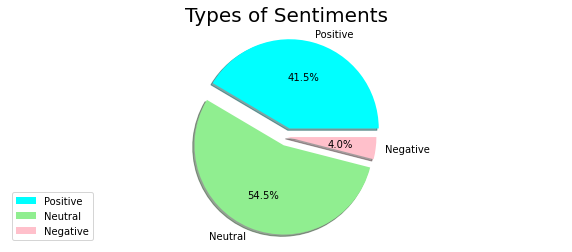

In [11]:
pos = (df.sentiment[df["sentiment"]=="Positive"].count())
neu = (df.sentiment[df["sentiment"]=="Neutral"].count())
neg = (df.sentiment[df["sentiment"]=="Negative"].count())
labels = 'Positive','Neutral',"Negative"
sizes = [pos,neu,neg]
colors = ['aqua', 'lightgreen', 'pink']
explode = (0.1, 0.1, 0)

# Plot the graph
plt.figure(figsize=(10,4))
plt.title("Types of Sentiments",fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True )
plt.legend(["Positive","Neutral","Negative"],loc =3)
plt.axis('equal')

plt.show()

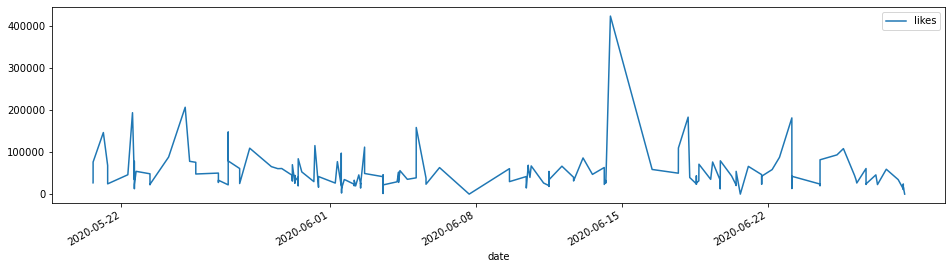

In [12]:
#Frequency of likes on dates
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4),label = "likes" , legend = True)
plt.show()

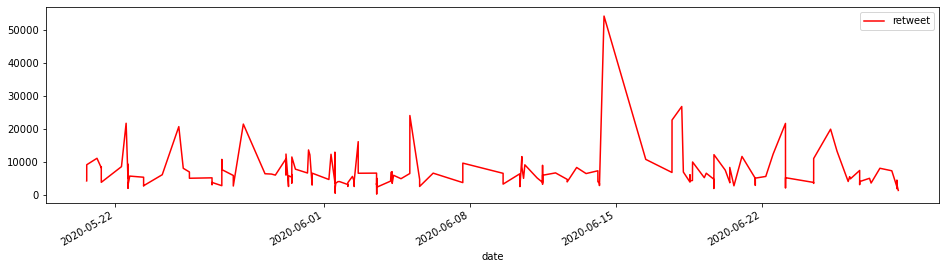

In [13]:
   # Layered Time Series:
time_likes = pd.Series(data=df['retweet'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), color= "r",label="retweet", legend=True)
